In [35]:
import warnings
warnings.filterwarnings('ignore')

# ***AEROFIT CASE STUDY***

**DEFINING PROBLEM STATEMENT**

 **ABOUT AEROFIT:**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**BUSINESS PROBLEM:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.



### About data:
* Product Purchased : KP281, KP481, or KP781
* Age : In years
* Gender : Male/Female
* Education : In years
* MaritalStatus : Single or partnered
* Usage : The average number of times the customer plans to use the treadmill each week.
* Income : Annual income (in USD)
* Fitness : Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles : The average number of miles the customer expects to walk/run each week

# **DEFINING BASIC MATRIX**


In [1]:
# importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the AEROFIT dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Outlier detection and treatment

## Basic Analysis:

> ### Shape of the data:

In [3]:
df.shape

(180, 9)

> ### Columns in dataframe:

In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

> ### Data-type of all attributes(columns):

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


> ### Statistical Summary

In [8]:
# Statistical Summary of Numeric Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [7]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**Inferences:** 

* Number of rows = 180
* Number of columns = 6
* There are no missing values in a given dataframe
* Most of the columns are numeric except Product,Gender and MaritalStatus
* Age - The age range of customers spans from 18 to 50 year, with an average age of 29 years.
*  Education - Customer education levels vary between 12 and 21 years, with an average education duration of 16 years.
* Usage - Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average usage frequency of 3 times per week.
* Fitness - On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness.
* Income - The annual income of customers falls within the range of USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.
* Miles - Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.
* Product - Over the past three months, the KP281 product demonstrated the highest sales performance among the three products
* Gender - Based on the data of last 3 months, around 58% of the buyers were Male and 42% were female
* Marital Status - Based on the data of last 3 months, around 60% of the buyers were Married and 40% were single

## Non-Graphical Analysis: Value counts and unique attributes

In [9]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [22]:
#checking the unique values for columns
for col in df.columns:
    print()
    print('Total Unique Values in',col,'column are :-',df[col].nunique())
    print('Unique Values in',col,'column are :-\n',df[col].unique())
    print()
    print('-'*30)


Total Unique Values in Product column are :- 3
Unique Values in Product column are :-
 ['KP281' 'KP481' 'KP781']

------------------------------

Total Unique Values in Age column are :- 32
Unique Values in Age column are :-
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

------------------------------

Total Unique Values in Gender column are :- 2
Unique Values in Gender column are :-
 ['Male' 'Female']

------------------------------

Total Unique Values in Education column are :- 8
Unique Values in Education column are :-
 [14 15 12 13 16 18 20 21]

------------------------------

Total Unique Values in MaritalStatus column are :- 2
Unique Values in MaritalStatus column are :-
 ['Single' 'Partnered']

------------------------------

Total Unique Values in Usage column are :- 6
Unique Values in Usage column are :-
 [3 2 4 5 6 7]

------------------------------

Total Unique Values in Fitness column are :- 5
Unique Values in Fitnes

In [25]:
for col in df.columns:
    if df[col].dtype != 'category':
        print(f'Value_counts of {col} are :- \n {df[col].value_counts().to_frame().reset_index()}')
        print()
        print('-'*30)

Value_counts of Product are :- 
   Product  count
0   KP281     80
1   KP481     60
2   KP781     40

------------------------------
Value_counts of Age are :- 
     Age  count
0    25     25
1    23     18
2    24     12
3    26     12
4    28      9
5    35      8
6    33      8
7    30      7
8    38      7
9    21      7
10   22      7
11   27      7
12   31      6
13   34      6
14   29      6
15   20      5
16   40      5
17   32      4
18   19      4
19   48      2
20   37      2
21   45      2
22   47      2
23   46      1
24   50      1
25   18      1
26   44      1
27   43      1
28   41      1
29   39      1
30   36      1
31   42      1

------------------------------
Value_counts of Gender are :- 
    Gender  count
0    Male    104
1  Female     76

------------------------------
Value_counts of Education are :- 
    Education  count
0         16     85
1         14     55
2         18     23
3         15      5
4         13      5
5         12      3
6         21      3
7

In [23]:
for i in df.columns:
    print(f'Proportion of data in {i}:',np.round(df[i].value_counts(normalize = True)*100,2))
    print('-'*20)

Proportion of data in Product: Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64
--------------------
Proportion of data in Age: Age
25    13.89
23    10.00
24     6.67
26     6.67
28     5.00
35     4.44
33     4.44
30     3.89
38     3.89
21     3.89
22     3.89
27     3.89
31     3.33
34     3.33
29     3.33
20     2.78
40     2.78
32     2.22
19     2.22
48     1.11
37     1.11
45     1.11
47     1.11
46     0.56
50     0.56
18     0.56
44     0.56
43     0.56
41     0.56
39     0.56
36     0.56
42     0.56
Name: proportion, dtype: float64
--------------------
Proportion of data in Gender: Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64
--------------------
Proportion of data in Education: Education
16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
12     1.67
21     1.67
20     0.56
Name: proportion, dtype: float64
--------------------
Proportion of data in MaritalStatus: MaritalStatus
Partnered    59.44
Single 

**Inference:**

* this data contains 57.78% male customers and 42.22% female customers
* 59.44% of customers are married, while the remaining 40.5% are single.

* There are no missing values in the data.
* There are 3 unique products ('KP281', 'KP481', 'KP781').
* KP281 is the most frequent product.
* Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.
* The standard deviation for Income & Miles is very high so there might be a possibility of outliers in those attibutes.
* The Average age of the customers is 28 and they have approx 16 yrs of education.
* The Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
* The Average fitness rating is 3.3 on a scale of 1 to 5.
* The Average number of miles the customer walks is 103 with max is almost 115 and minimum of 21.
* There are 107 partnered customers and 73 single customers.
* On an Average , customers use threadmill THRICE a week.


## Data Preprocessing:

> ### Missing Values and Outliers Detection:

In [15]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

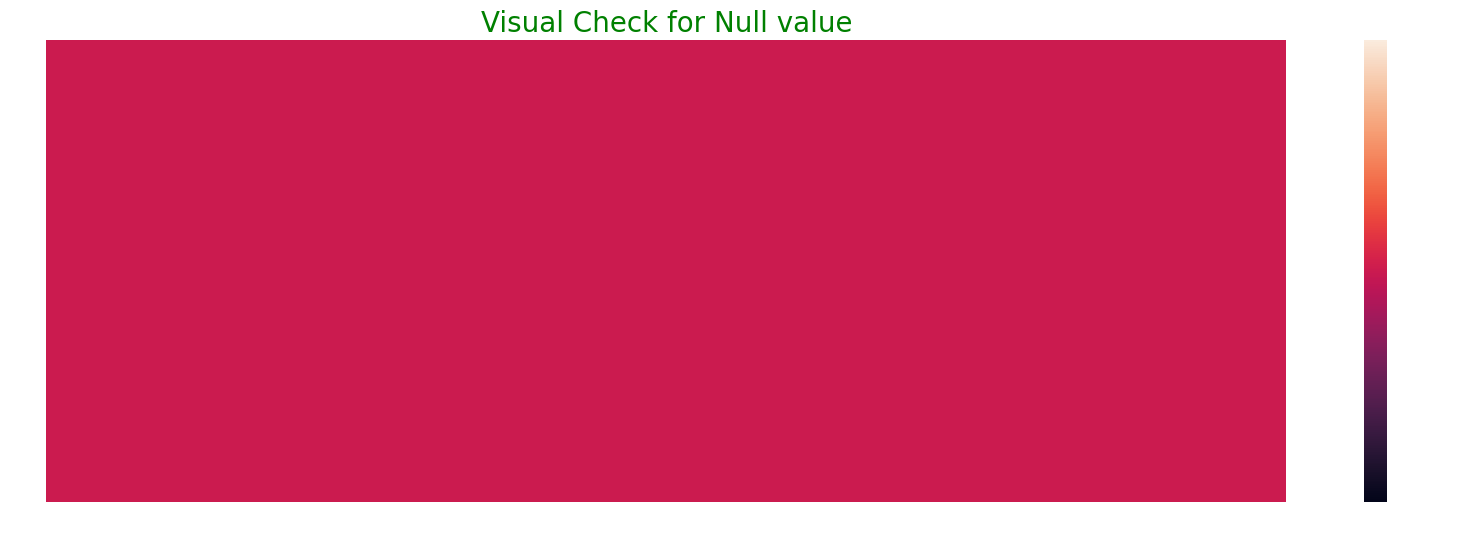

In [55]:
plt.figure(figsize=(20,6))

plt.style.use('dark_background')
sns.heatmap(df.isnull())
plt.title('Visual Check for Null value', fontsize = 20, color = 'green')
plt.show()

In [19]:
print('Parameter Ranges:')
print(f"Age : {df.Age.min()}yrs - {df.Age.max()}yrs")
print(f"Education : {df.Education.min()} - {df.Education.max()} yrs")
print(f"Usage : {df.Usage.min()} - {df.Usage.max()} days per week")
print(f"Fitness : {df.Fitness.min()} - {df.Fitness.max()} in a scale")
print(f"Income : {round(df.Income.min()//1000)}k - {round(df.Income.max()//1000)}k in $")
print(f"Miles : {df.Miles.min()} - {df.Miles.max()} miles per week")

Parameter Ranges:
Age : 18yrs - 50yrs
Education : 12 - 21 yrs
Usage : 2 - 7 days per week
Fitness : 1 - 5 in a scale
Income : 29k - 104k in $
Miles : 21 - 360 miles per week


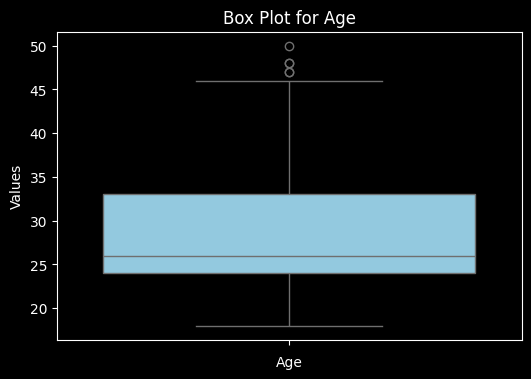

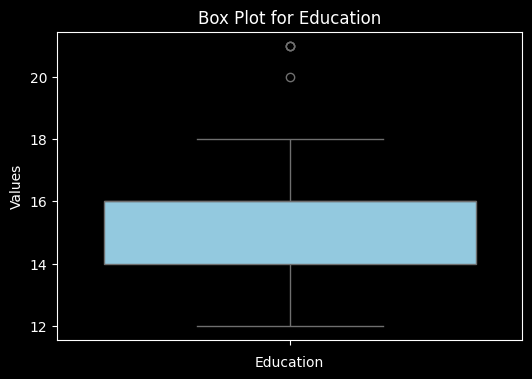

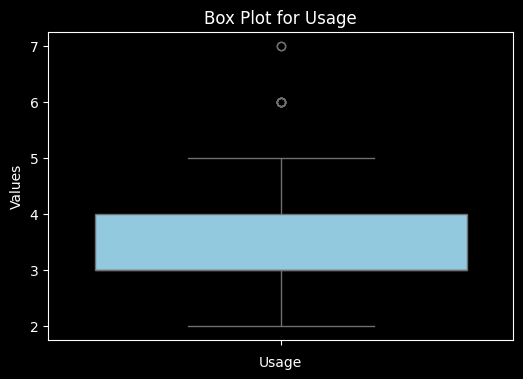

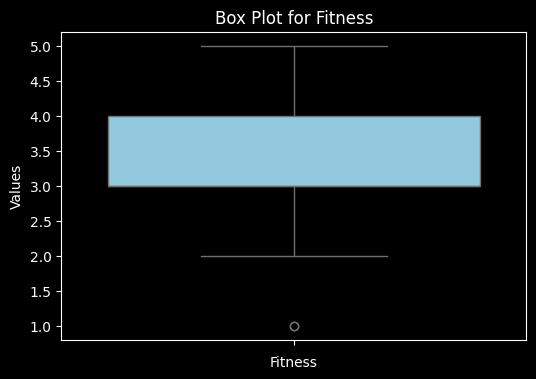

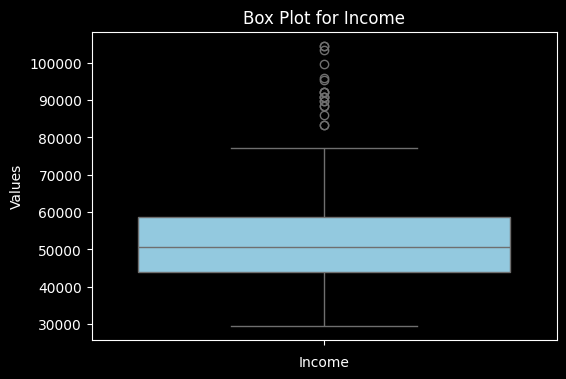

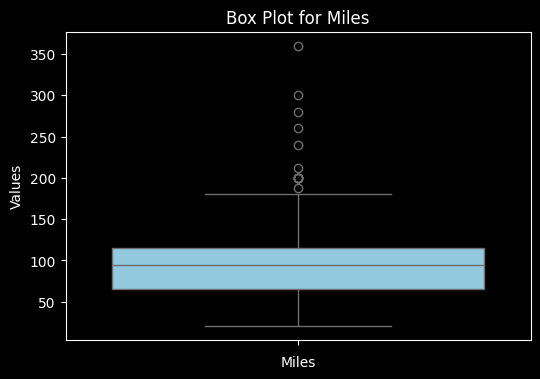

In [26]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Plot box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

**Inference:**

* There are no missing values in a given dataframe.
* some possible outliers were present in the data set.

> ### Feature Engineering:- Income group and Age group:

In [28]:
# Age group: 
'''
18-29:Young
30-39:Middle-aged
40-50: Old
'''
df.Age.describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [29]:
df['Age group']= pd.cut(df['Age'],bins=[17,29,39,50],labels=['Young','Middle-aged','Old'])
print(df['Age group'].value_counts())

Age group
Young          113
Middle-aged     50
Old             17
Name: count, dtype: int64


In [30]:
# Income group:
'''
29000-50000: Low
51000-75000: Medium
76000-105000: High
'''
df.Income.describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [31]:
df['Income group']=pd.cut(df['Income'],bins=[29000,50000,75000,105000],labels=['Low','Medium','High'])
print(df['Income group'].value_counts())

Income group
Low       83
Medium    76
High      21
Name: count, dtype: int64


In [32]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Low


## Univariate Analysis:

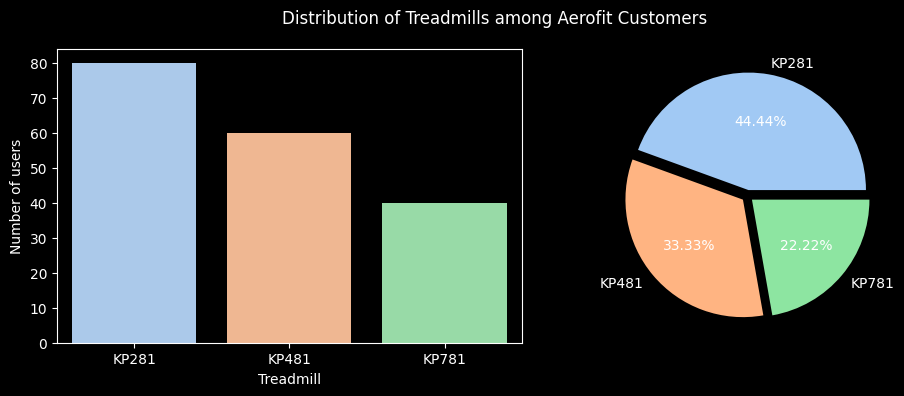

In [37]:
# Distribution of Treadmills amongst customers:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data = df,x = df['Product'], palette='pastel')
plt.xlabel('Treadmill')
plt.ylabel('Number of users')

plt.subplot(122)
plt.pie(df['Product'].value_counts(), labels = df['Product'].unique(),
        explode= (0.05,0.05,0.05),
        colors=sns.color_palette('pastel'), 
        autopct='%.2f%%')

plt.suptitle('Distribution of Treadmills among Aerofit Customers')
plt.tight_layout()
plt.show()

**Inference:**

* Amongst the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.
* KP281, being an entry-level and more affordable treadmill compared to the others, is the preferred choice among the majority of customers.
* 33.3% of customers favor the KP481 treadmill, drawn by its ideal fit for mid-level runners and its excellent value-for-money offering.
* KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of customers.

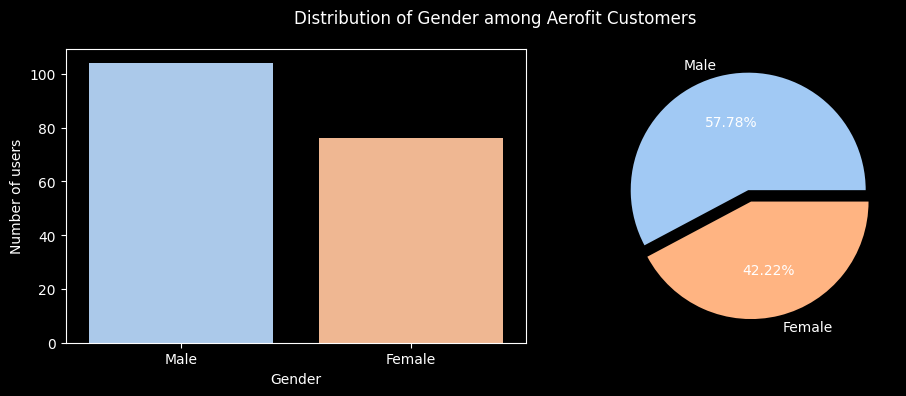

In [40]:
# Distribution of gender among the customers:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data = df,x = df['Gender'], palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Number of users')

plt.subplot(122)
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].unique(),
        explode= (0.05,0.05),
        colors=sns.color_palette('pastel'), 
        autopct='%.2f%%')

plt.suptitle('Distribution of Gender among Aerofit Customers')
plt.tight_layout()
plt.show()

**Inference:**
* Aerofit has 57.78% male customers and 42.22% female customers.

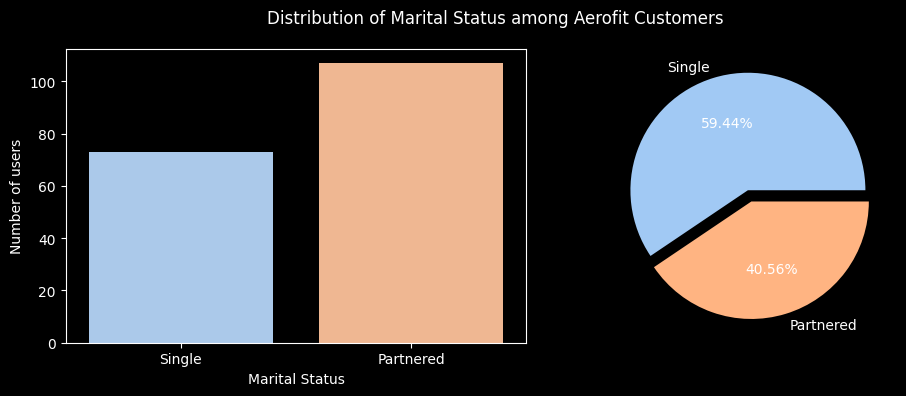

In [41]:
# Distribution of Marital status among the customers:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data = df,x = df['MaritalStatus'], palette='pastel')
plt.xlabel('Marital Status')
plt.ylabel('Number of users')

plt.subplot(122)
plt.pie(df['MaritalStatus'].value_counts(), labels = df['MaritalStatus'].unique(),
        explode= (0.05,0.05),
        colors=sns.color_palette('pastel'), 
        autopct='%.2f%%')

plt.suptitle('Distribution of Marital Status among Aerofit Customers')
plt.tight_layout()
plt.show()

59.4% of Aerofit customers are married, while remaining 40.56% are single.

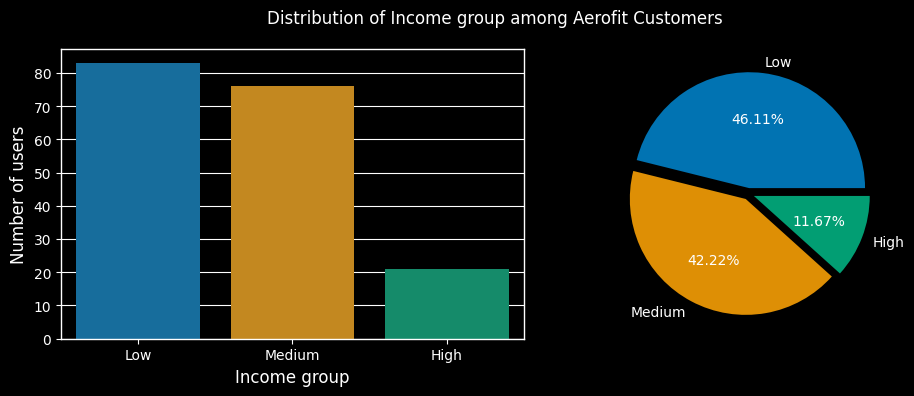

In [57]:
# Distribution of Income group, amongst customers:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data = df,x = df['Income group'], palette='colorblind')
plt.xlabel('Income group')
plt.ylabel('Number of users')

plt.subplot(122)
plt.pie(df['Income group'].value_counts(), labels = df['Income group'].unique(),
        explode= (0.05,0.05,0.05),
        colors=sns.color_palette('colorblind'), 
        autopct='%.2f%%')

plt.suptitle('Distribution of Income group among Aerofit Customers')
plt.tight_layout()
plt.show()

**Insight:**

* Approximately 88% of Aerofit customers belong to the low-income (29000-50000 USD) and medium-income (51000-75000 USD) groups.
* Remaining 11.67% belongs to High income group (above 75000 usd).

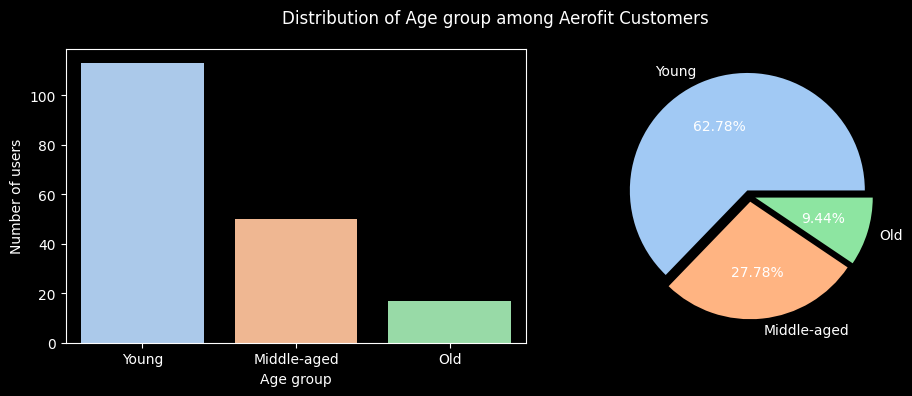

In [43]:
# Distribution of Age group, amongst customers:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data = df,x = df['Age group'], palette='pastel')
plt.xlabel('Age group')
plt.ylabel('Number of users')

plt.subplot(122)
plt.pie(df['Age group'].value_counts(), labels = df['Age group'].unique(),
        explode= (0.05,0.05,0.05),
        colors=sns.color_palette('pastel'), 
        autopct='%.2f%%')

plt.suptitle('Distribution of Age group among Aerofit Customers')
plt.tight_layout()
plt.show()

**Insight:**

* Most of the Aerofit customer falls under young age-group (18-29).
* 27.78 % of middle-aged(30-39) users prefer to use the Aerofit Treadmills.
* 9.4% of users in the old (40-50) age group prefer purchasing Aerofit treadmills.

> ### Numerical features:

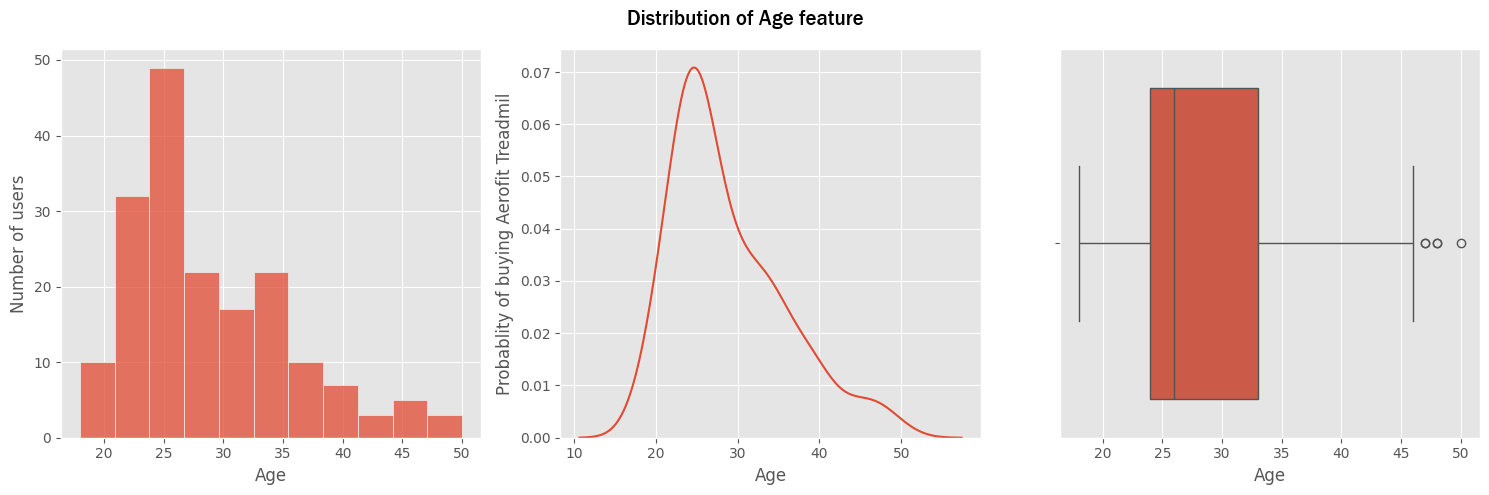

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

# Histogram
plt.subplot(131)
sns.histplot(data=df,x='Age')
plt.xlabel('Age')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(132)
sns.kdeplot(data=df,x='Age')
plt.xlabel('Age')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(133)
sns.boxplot(data=df,x='Age')

plt.suptitle('Distribution of Age feature',fontname='Franklin Gothic Medium', fontsize=15,color = 'black')
plt.tight_layout()
plt.show()

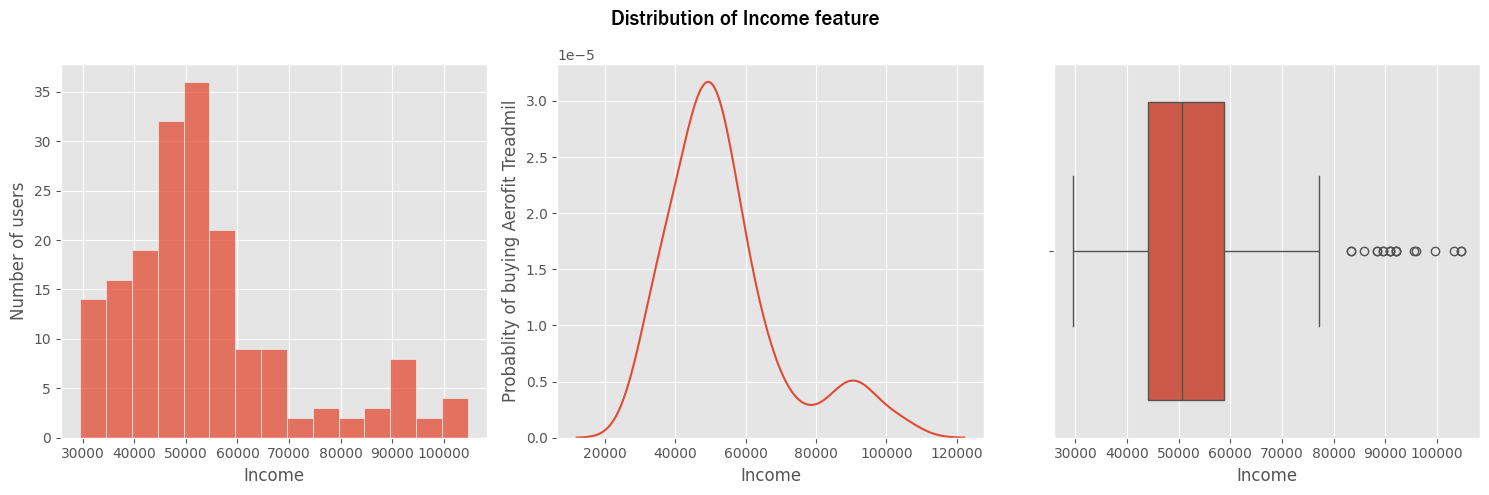

In [49]:
plt.figure(figsize=(15,5))

# Histogram
plt.subplot(131)
sns.histplot(data=df,x='Income')
plt.xlabel('Income')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(132)
sns.kdeplot(data=df,x='Income')
plt.xlabel('Income')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(133)
sns.boxplot(data=df,x='Income')

plt.suptitle('Distribution of Income feature',fontname='Franklin Gothic Medium', fontsize=15,color = 'black')
plt.tight_layout()
plt.show()

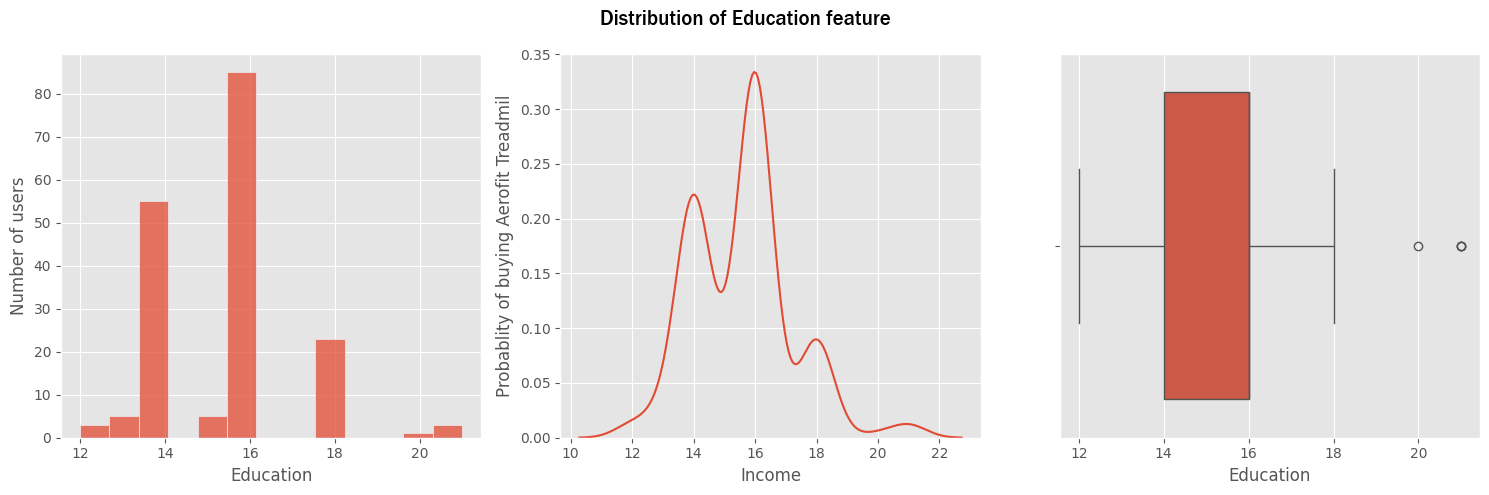

In [50]:
plt.figure(figsize=(15,5))

# Histogram
plt.subplot(131)
sns.histplot(data=df,x='Education')
plt.xlabel('Education')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(132)
sns.kdeplot(data=df,x='Education')
plt.xlabel('Education')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(133)
sns.boxplot(data=df,x='Education')

plt.suptitle('Distribution of Education feature',fontname='Franklin Gothic Medium', fontsize=15,color = 'black')
plt.tight_layout()
plt.show()

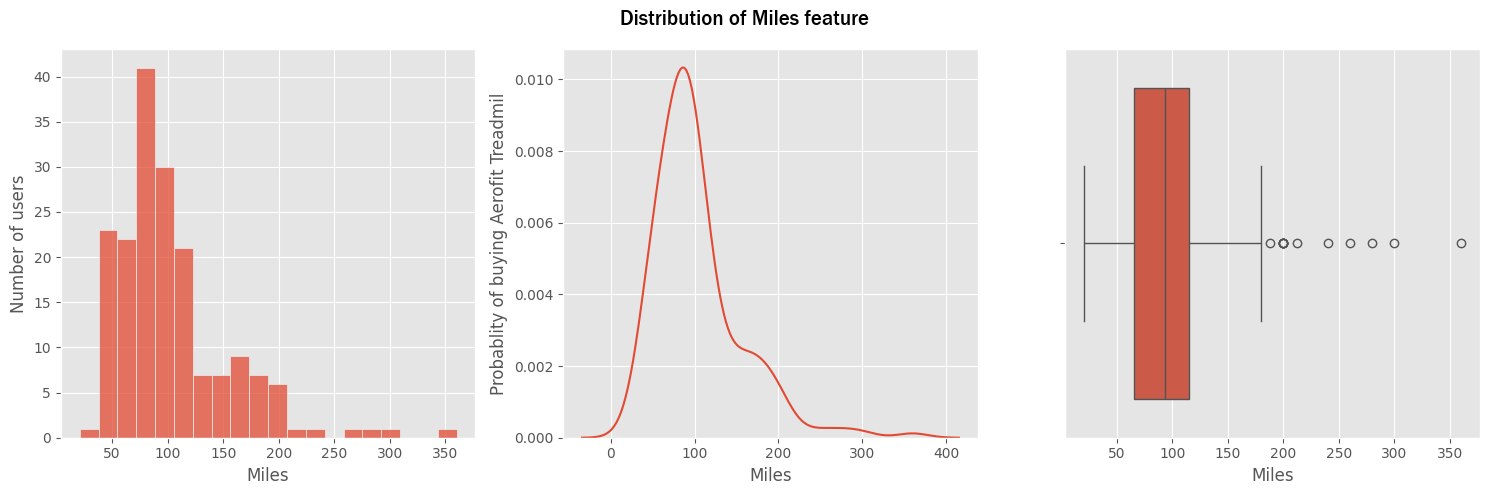

In [51]:
plt.figure(figsize=(15,5))

# Histogram
plt.subplot(131)
sns.histplot(data=df,x='Miles')
plt.xlabel('Miles')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(132)
sns.kdeplot(data=df,x='Miles')
plt.xlabel('Miles')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(133)
sns.boxplot(data=df,x='Miles')

plt.suptitle('Distribution of Miles feature',fontname='Franklin Gothic Medium', fontsize=15,color = 'black')
plt.tight_layout()
plt.show()

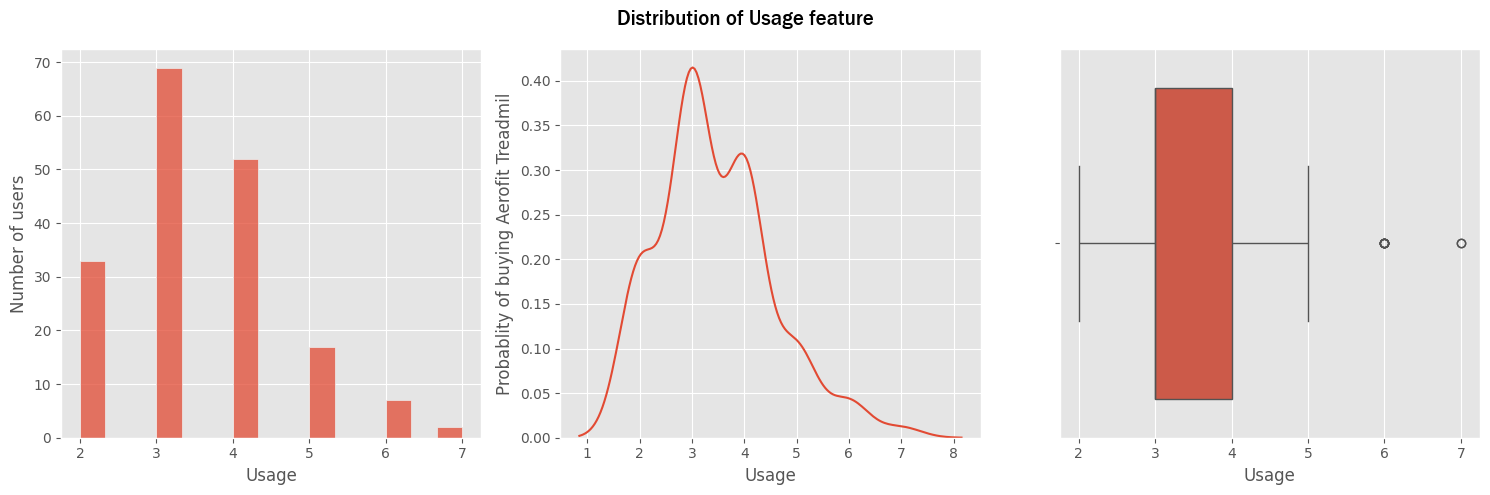

In [52]:
plt.figure(figsize=(15,5))

# Histogram
plt.subplot(131)
sns.histplot(data=df,x='Usage')
plt.xlabel('Usage')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(132)
sns.kdeplot(data=df,x='Usage')
plt.xlabel('Usage')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(133)
sns.boxplot(data=df,x='Usage')

plt.suptitle('Distribution of Usage feature',fontname='Franklin Gothic Medium', fontsize=15,color = 'black')
plt.tight_layout()
plt.show()

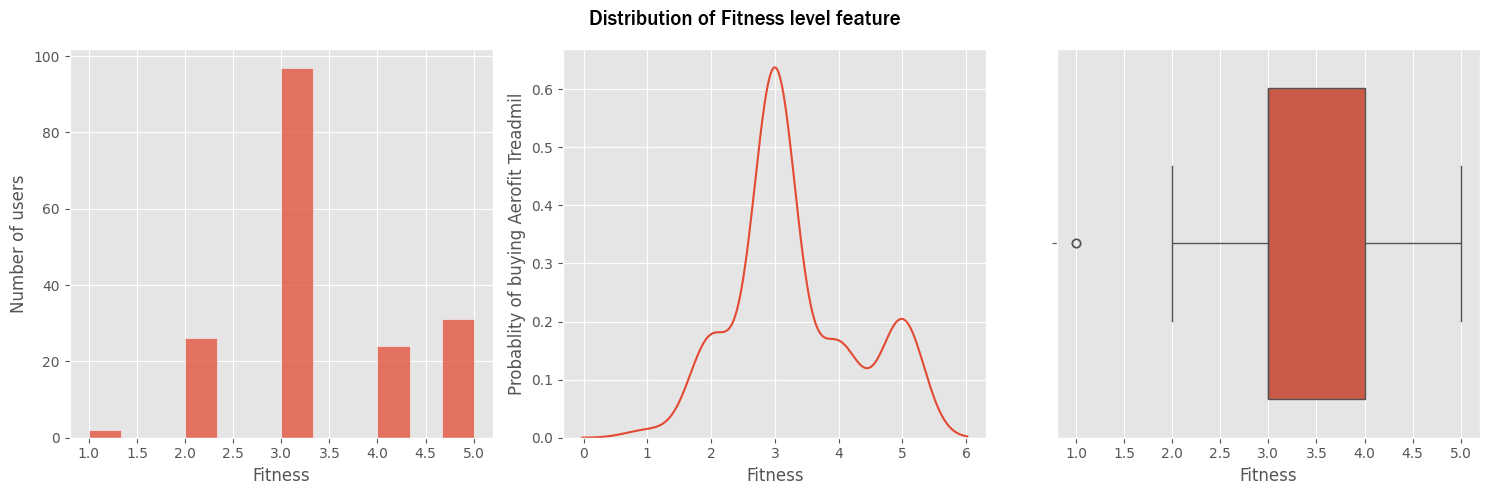

In [53]:
plt.figure(figsize=(15,5))

# Histogram
plt.subplot(131)
sns.histplot(data=df,x='Fitness')
plt.xlabel('Fitness')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(132)
sns.kdeplot(data=df,x='Fitness')
plt.xlabel('Fitness')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(133)
sns.boxplot(data=df,x='Fitness')

plt.suptitle('Distribution of Fitness level feature',fontname='Franklin Gothic Medium', fontsize=15,color = 'black')
plt.tight_layout()
plt.show()

Insight:
* The majority of Aerofit customers belong to the age group of 18-30, and there is a high probability of them purchasing Aerofit treadmills.
* There are very few users in the age group of 40-50, and the probability of them buying Aerofit treadmills is significantly low.
* The majority of Aerofit customers fall within the income range of 40000-60000, and there is a high probability of them purchasing Aerofit treadmills.
* Surprisingly, customers with an income greater than 80000 have a significantly lower likelihood of buying Aerofit treadmills.
* Customers who run 90-100 miles per week show a preference for using Aerofit treadmills.
* Hardcore runners, averaging 200-250 miles per week, tend to prefer jogging over using Aerofit treadmills.
* Customers with 16 years of education are the primary purchasers of Aerofit treadmills.
* Customers with education greater than 18 years have a significantly lower probablity of purchasing the Aerofit treadmills.
* The majority of customers use treadmills three times a week, indicating a higher probability of them purchasing a treadmill from Aerofit.
* The majority of Aerofit customers possess fitness level 3, which aligns with a high likelihood of them purchasing treadmills.

## Bivariate Analysis:
> ### Distribution of gender across each Treadmill

Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33
------------------------------


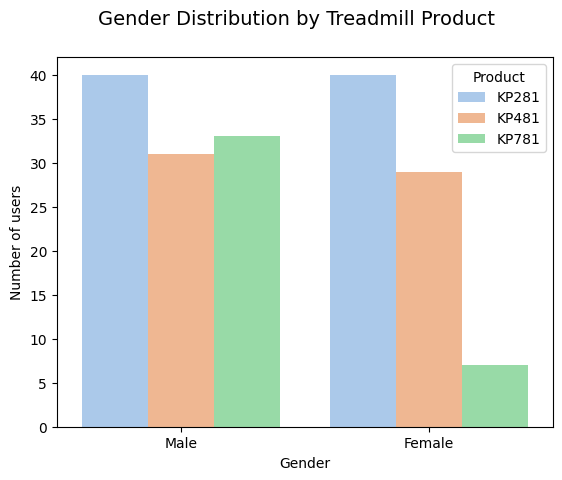

In [64]:
# Counting the number of customers for each gender in each product group
plt.style.use('default')
gender_df = df.groupby(['Product', 'Gender']).size().unstack()
print(gender_df)
print('-'*30)

sns.countplot(data = df, x = 'Gender', hue='Product', palette = sns.color_palette('pastel'))
plt.suptitle('Gender Distribution by Treadmill Product', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of users')
plt.show()

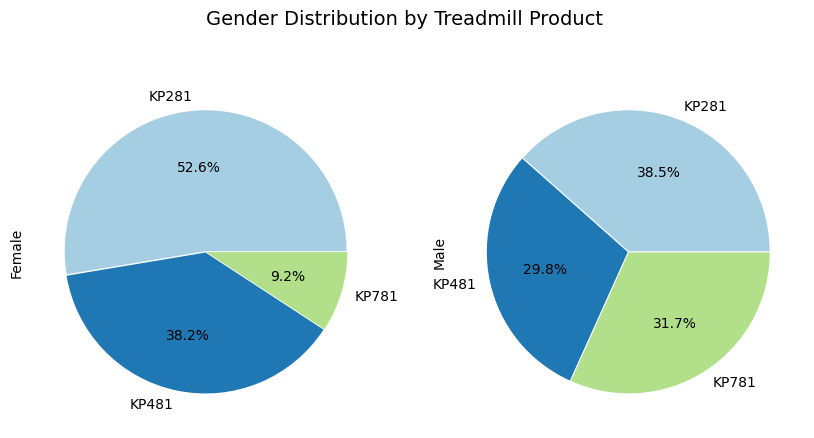

In [68]:
gender_df.plot(kind='pie',subplots=True ,figsize=(10,5),explode=(0.005,0.005,0.005), autopct='%1.1f%%', legend=False,colors=sns.color_palette('Paired'))
plt.suptitle('Gender Distribution by Treadmill Product', fontsize=14)
plt.show()

**Infernce: **
* Both male and female customers prefer using the KP281 treadmill due to its entry-level status and cost-effectiveness compared to the other two options.
* Both male and female customers equally prefer the KP481 treadmill as it offers the best value for money among the other two options.
* Among male customers, the KP781 treadmill is the most preferred due to its advanced features following the KP281. However, the number of female customers using the KP781 treadmill is very low, possibly due to its higher cost compared to the other options.
* Among male customers, 38.5% prefer KP281 as an entry-level and cost-effective option. Meanwhile, 29.8% opt for KP481 due to its value for money proposition, and 31.7% favor KP781 for its advanced features.
* Among female customers, 52.6% prefer KP281 as an entry-level and cost-effective option. Additionally, 38.2% opt for KP481 due to its value for money proposition, while only 9.2% favor KP781 due to its higher cost compared to the other two options.

> ### Distribution of Martial Status among customers who purchased each treadmill

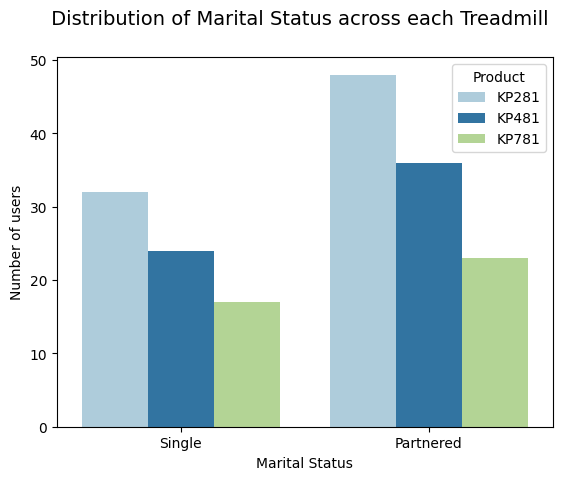

In [70]:
sns.countplot(data = df,x='MaritalStatus',hue='Product',palette='Paired')
plt.suptitle(' Distribution of Marital Status across each Treadmill', fontsize=14)
plt.xlabel('Marital Status')
plt.ylabel('Number of users')
plt.show()

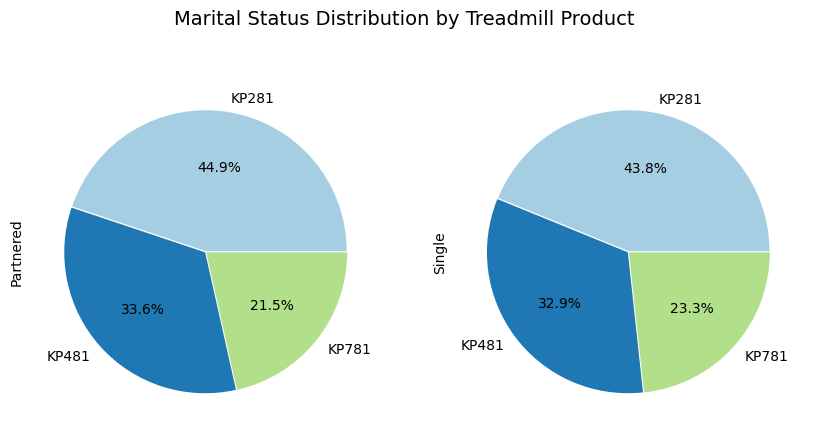

In [71]:
# Counting the number of customers for each marital status in each product group
MaritalStatus_df = df.groupby(['Product', 'MaritalStatus']).size().unstack()

#pie charts indicating the distribution
MaritalStatus_df.plot(kind='pie',subplots=True ,figsize=(10,5),explode=(0.005,0.005,0.005), autopct='%1.1f%%', 
                      legend=False, colors = sns.color_palette('Paired'))
plt.suptitle('Marital Status Distribution by Treadmill Product', fontsize=14)
plt.show()

Insight:

Among married customers, the purchase distribution for Aerofit treadmills is as follows: 44.9% prefer KP281, 33.6% prefer KP481, and the remaining 21.7% prefer KP781.

Among single customers , the purchase distribution for Aerofit treadmills is as follows: 43.8 % prefer KP281, 32.9% prefer KP481, and the remaining 23.3% pefer KP781.

> ### Distribution of Age group for each Treadmill:

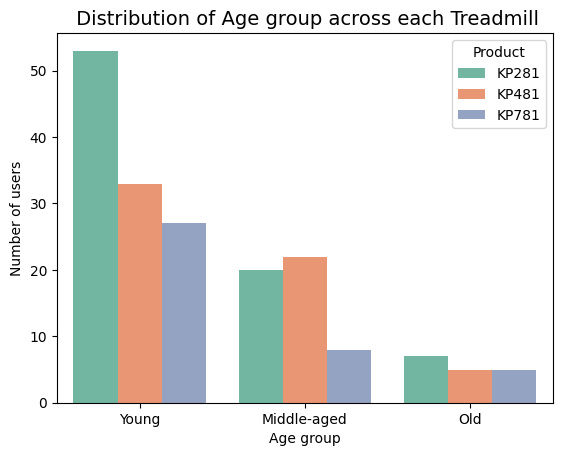


---- Age groups ----
18-29: Young
30-39: Middle-aged
40-50: Old


In [83]:
sns.countplot(data=df,x='Age group',hue='Product',palette='Set2')
plt.title(' Distribution of Age group across each Treadmill', fontsize=14)
plt.xlabel('Age group')
plt.ylabel('Number of users')
plt.show()
print()
print('---- Age groups ----')
print('18-29: Young')
print('30-39: Middle-aged')
print('40-50: Old')

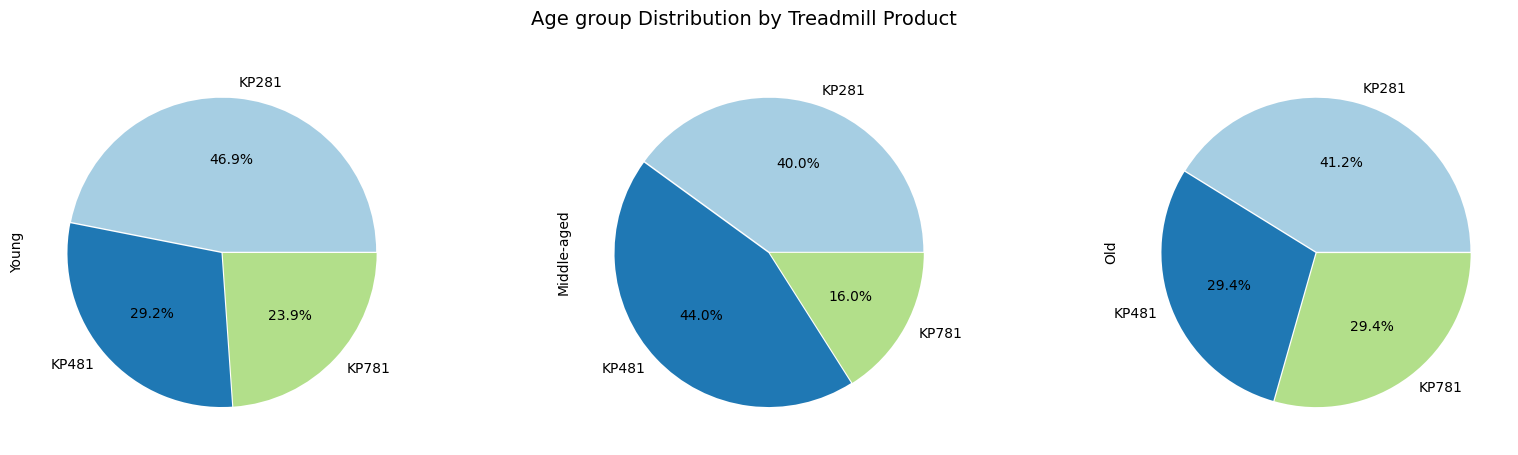

In [84]:
# Counting the number of customers for each marital status in each product group
AgeGroup_df = df.groupby(['Product', 'Age group']).size().unstack()

#pie charts indicating the distribution
AgeGroup_df.plot(kind='pie', subplots = True ,figsize=(20,5), explode = (0.005,0.005,0.005), autopct='%1.1f%%', 
                 legend = False, colors=sns.color_palette('Paired'))
plt.suptitle('Age group Distribution by Treadmill Product', fontsize=14)
plt.show()

**Insight:**

* The majority of young users prefer the KP281 treadmill over the other two options. However, there is a significant number of young people using the KP781 treadmill, likely drawn to its advanced features.
* Surprisingly, among middle-aged customers, KP481 is the most popular compared to KP281, possibly due to its appeal to mid runners. However, only a few middle-aged customers prefer using the KP781 treadmill.
* Among old customers, KP281 remains the best choice for them, while KP481 and KP781 are equally preferred. It is important to note that the number of old customers is significantly less compared to the other two age groups.

* Among young customers, the purchase distribution for Aerofit treadmills is as follows: 46.9% prefer KP281, 29.2% prefer KP481, and the remaining 23.9% prefer KP781.
* Surprisingly, 44% of middle-aged customers prefer KP481 over the other two treadmills, while 40.0% prefer KP281, and only 16% prefer the KP781.
* Among old customers, 41.2% prefer KP281, while 29.4% prefer both KP481 and KP781.

> ### Distribution of Income-group across Treadmills:

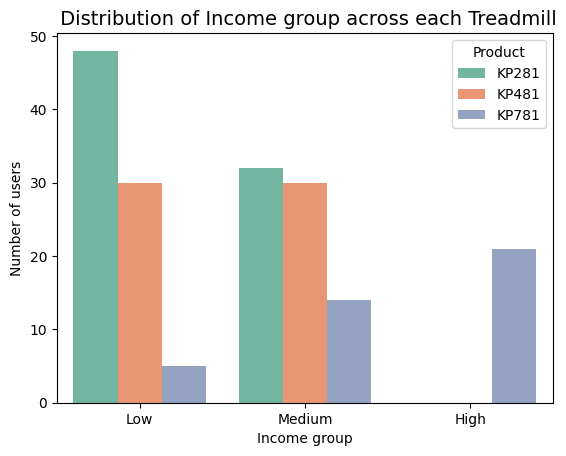


---- Income groups ----
29000-50000: Low
51000-75000: Middle
Above 76000: High


In [82]:
sns.countplot(data = df, x='Income group',hue ='Product',palette = 'Set2')
plt.title(' Distribution of Income group across each Treadmill', fontsize=14)
plt.xlabel('Income group')
plt.ylabel('Number of users')
plt.show()
print()
print('---- Income groups ----')
print('29000-50000: Low')
print('51000-75000: Middle')
print('Above 76000: High')

**Insight:**

* Customers belonging to the low-income group prefer KP281 due to its affordability compared to the other two treadmills. Additionally, around 30 customers from this income group have purchased KP481. However, only a few customers in this income group have chosen to purchase the more expensive KP781 treadmill.
* Customers belonging to the middle-income group exhibit similar preference for both KP281 and KP481 treadmills, with a marginal difference in frequency. Additionally, approximately 15-20 customers from this group have also purchased the more expensive KP781 treadmill.
* Customers belonging to the high-income group exclusively prefer KP781 due to its advanced features and higher cost compared to the other two treadmills

> ### Distribution Miles and Education for each Treadmill

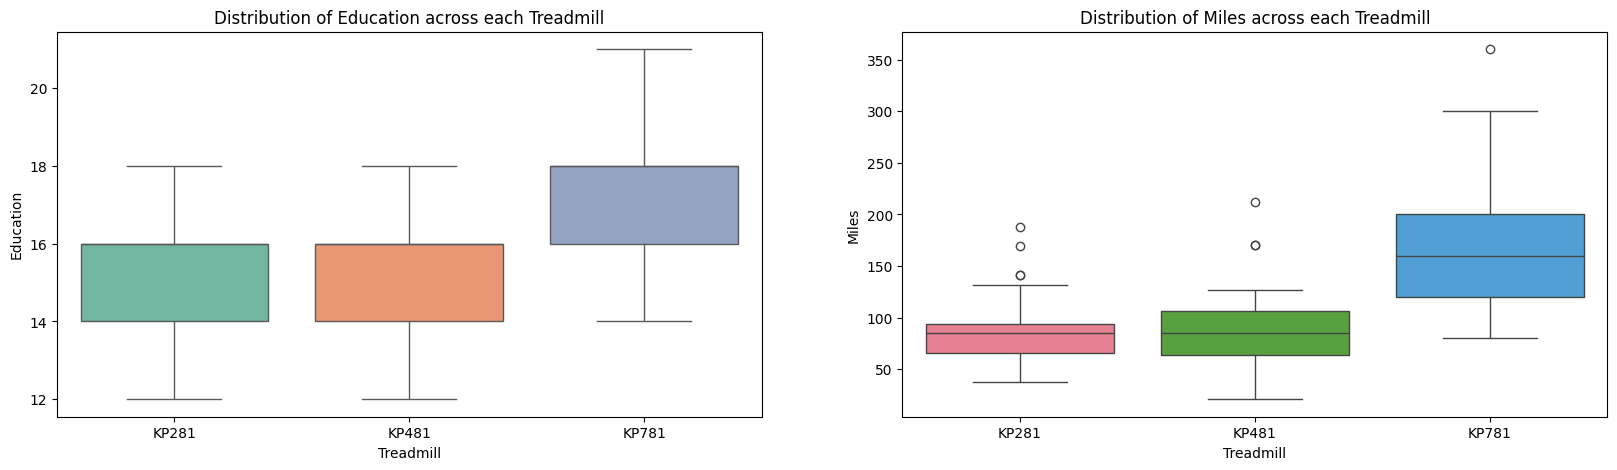

In [80]:
plt.figure(figsize=(20,5))
# Usage column
plt.subplot(121)
sns.boxplot(data = df, x='Product',y ='Education', palette = sns.color_palette('Set2'))
plt.xlabel('Treadmill')
plt.ylabel('Education')
plt.title('Distribution of Education across each Treadmill')

# Fitness column
plt.subplot(122)
sns.boxplot(data=df,x ='Product',y ='Miles',palette = 'husl')
plt.xlabel('Treadmill')
plt.ylabel('Miles')
plt.title('Distribution of Miles across each Treadmill')

plt.show()

**Insight:**

* Customers with 14-16 years of education prefer the KP281 and KP481 treadmills. However, among all treadmills, the majority of customers with 16-18 years of education prefer the KP781 treadmill.
* Customers who run 60-100 miles per week prefer the KP281 treadmill, while mid runners who run 60-120 miles per week opt for the KP481. On the other hand, hardcore runners who run 120-200 miles per week prefer the KP781 treadmill due to its advanced features.

> ### Distribution of Usage and Fitness across each Treadmill:

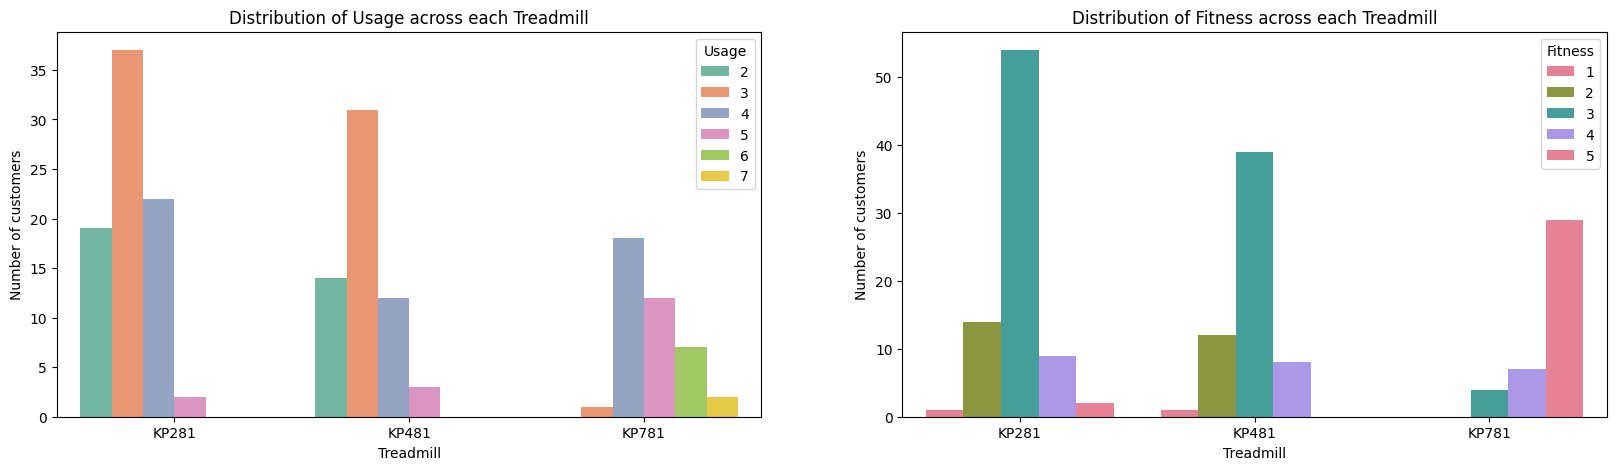

In [78]:
plt.figure(figsize=(20,5))
# Usage column
plt.subplot(121)
sns.countplot(data=df,x='Product',hue='Usage',palette = sns.color_palette('Set2'))
plt.xlabel('Treadmill')
plt.ylabel('Number of customers')
plt.title('Distribution of Usage across each Treadmill')

# Fitness column
plt.subplot(122)
sns.countplot(data=df,x='Product',hue='Fitness',palette = 'husl')
plt.xlabel('Treadmill')
plt.ylabel('Number of customers')
plt.title('Distribution of Fitness across each Treadmill')

plt.show()

**Insight:**

* Customers who use treadmills 3 times a week prefer both KP281 and KP481. However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.
* Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.

# Heatmap:

In [85]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age group', 'Income group'],
      dtype='object')

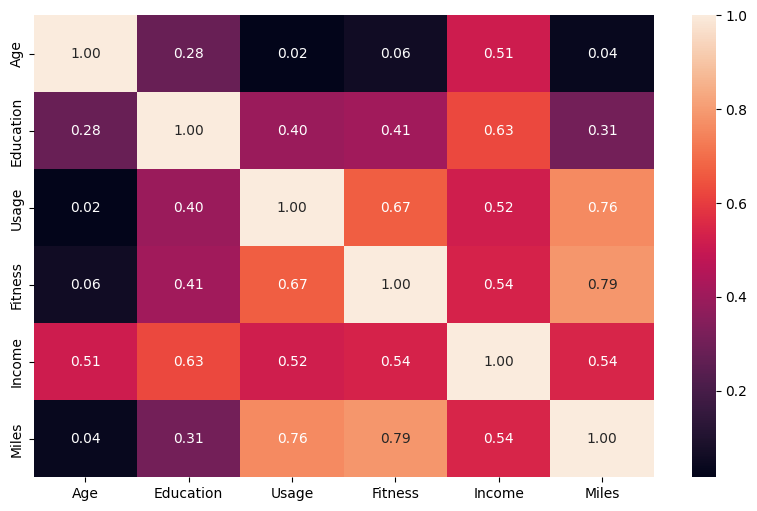

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Age', 'Education', 'Usage',
       'Fitness', 'Income', 'Miles']].corr(),annot=True,cmap = 'rocket',fmt='.2f')
plt.show()

**Analysis:**

* Age and Education:There is a positive correlation of approximately 0.28 between Age and Education. This indicates that as the customers' age increases, their education level tends to be higher.

* Age and Income: There is a moderate positive correlation of approximately 0.51 between Age and Income. This suggests that as the customers' age increases, their income tends to be higher.
* Education and Income: There is a relatively strong positive correlation of approximately 0.63 between Education and Income. This suggests that customers with higher levels of education tend to have higher incomes.
* Usage and Fitness: There is a strong positive correlation of approximately 0.67 between Usage and Fitness. This indicates that customers who plan to use the treadmill more frequently tend to have higher fitness levels.
* Fitness and Miles: There is a strong positive correlation of approximately 0.79 between Fitness and Miles. This indicates that customers with higher fitness levels also expect to walk/run more miles per week.
* Age and Fitness: There is a weak positive correlation of approximately 0.06 between Age and Fitness. Similar correlation can be observed with Age and Usage as well as Age and Miles

## Conditional and Marginal Probablities:
> ### Impact of gender on purchasing the treadmill

In [89]:
pd.crosstab(index = df['Product'], columns = df['Gender'],margins=True,
            margins_name='Total',
            normalize=True).round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


> **Marginal Probablities:**

* P(KP281)= 0.44
* P(KP481)= 0.33
* P(kP781)= 0.22
* P(Male)= 0.58
* P(Female)= 0.42

> **Conditional Probablities**

* P(KP281|Male) = 0.22
* P(KP281|Female) = 0.22
* P(KP481|Male) = 0.17
* P(KP481|Female) = 0.16
* P(KP781|Male) = 0.18
* P(KP781|Female)= 0.04

> ### Impact of marital status on purchasing the Treadmill

In [91]:
pd.crosstab(index = df['Product'], columns = df['MaritalStatus'],margins=True,
            margins_name='Total',
            normalize=True).round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


> **Marginal Probablities:**

* P(KP281)= 0.44
* P(KP481)= 0.33
* P(kP781)= 0.22
* P(Patnered)= 0.59
* P(Single)= 0.41

> **Conditional Probablities:**

* P(KP281|Partnered) = 0.27
* P(KP281|Single) = 0.18
* P(KP481|Partnered) = 0.20
* P(KP481|Single) = 0.13
* P(KP781|Partnered) = 0.13
* P(KP781|Single)= 0.09

> ### Impact of Age groups on purchasing the treadmill

In [93]:
pd.crosstab(index=df['Product'],columns=df['Age group'],margins=True,margins_name='Total',normalize=True).round(2)

Age group,Young,Middle-aged,Old,Total
Product,,,,
KP281,0.29,0.11,0.04,0.44
KP481,0.18,0.12,0.03,0.33
KP781,0.15,0.04,0.03,0.22
Total,0.63,0.28,0.09,1.00


> **Marginal Probablities**

* P(KP281)= 0.44
* P(KP481)= 0.33
* P(kP781)= 0.22
* P(Young)= 0.63
* P(Middle-aged)= 0.28
* P(Old)= 0.09

> **Conditional Probablities:**

* P(KP281|Young) = 0.29
* P(KP281|Middle-aged) = 0.11
* P(KP281|Old) = 0.04
* P(KP481|Young) = 0.18
* P(KP481|Middle-aged) = 0.12
* P(KP481|Old)= 0.03
* P(KP781|Young) = 0.15
* P(KP781|Middle-aged) = 0.04
* P(KP781|Old)= 0.03

> ### Impact of Income groups on purchasing the treadmill:

In [92]:
pd.crosstab(index=df['Product'],columns=df['Income group'],margins=True,margins_name='Total',normalize=True).round(2)

Income group,Low,Medium,High,Total
Product,,,,
KP281,0.27,0.18,0.00,0.44
KP481,0.17,0.17,0.00,0.33
KP781,0.03,0.08,0.12,0.22
Total,0.46,0.42,0.12,1.00


> **Marginal Probablities:**

* P(KP281)= 0.44
* P(KP481)= 0.33
* P(kP781)= 0.22
* P(Low)= 0.46
* P(Medium)= 0.42
* P(High)= 0.12

> **Conditional Probablities:**

* P(KP281|Low) = 0.27
* P(KP281|Medium) = 0.18
* P(KP281|High) = 0.00
* P(KP481|Low) = 0.17
* P(KP481|Medium) = 0.17
* P(KP481|High)= 0.00
* P(KP781|Low) = 0.03
* P(KP781|Medium) = 0.08
* P(KP781|High)= 0.12

# Customer Profiling: 

> Potential Buyers for KP281 Treadmill

* Gender : Male and Female
* Marital status: Both Partnered or single
* Age:18-29 as probablity of old customers purchasing the KP281 is low
* Income:29000-50000 USD as probability of customers belonging to high income group purchasing the KP281 treadmill is 0.
* Education:14-16 years
* Fitness level':3
* Usage: use treadmill 3 times in a week
* Miles: Runs 60-100 miles per week

> Potential Buyers for KP481 Treadmill

* Gender : Both Male and Female
* Marital status: Both Partnered or single
* Age:18-39 years
* Income:29000-75000 USD as probability of customers belonging to high income group purchasing the KP481 treadmill is 0.
* Education:14-16 years
* Fitness level':3
* Usage: use treadmill 3 times in a week
* Miles: Runs 80-120 miles per week --> Mostly midrunners.

> Potential Buyers for KP781 Treadmill

* Gender : Only male customers as probablity of female customers buying KP781 is very low.
* Marital status: Only married customers as probablity of single customers buying KP781 is also low.
* Age:18-39 years
* Income:75000-105000 USD as probability of customers belonging to low and middle-income groups purchasing the KP781 treadmill is very low.
* Education:16-18 years
* Fitness level':5
* Usage: use treadmill 3 times in a week
* Miles: Runs 120 200 miles per week --> Mostly hardcore runners.

# Insights: 
* Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.
* KP281, being an entry-level and more affordable treadmill compared to the others, is the preferred choice among the majority of customers.
* 33.3% of customers favor the KP481 treadmill, drawn by its ideal fit for mid-level runners and its excellent value-for-money offering.
* KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of customers.
* Aerofit has 57.78% male customers and 42.22% female customers.
* Among male customers, 38.5% prefer KP281 as an entry-level and cost-effective option. Meanwhile, 29.8% opt for KP481 due to its value for money proposition, and 31.7% favor KP781 for its advanced features.
* Among female customers, 52.6% prefer KP281 as an entry-level and cost-effective option. Additionally, 38.2% opt for KP481 due to its value for money proposition, while only 9.2% favor KP781 due to its higher cost compared to the other two options.
* Probablity of female customers buying KP781 is 4% which is very low.
* Both female and male customers equally prefers KP281 with probablity 22.2%.
* Probablity of male customers buying KP481 is 17%
* Probablity of female customers buying KP481 is 16% which is also good.
* 59.4% of Aerofit customers are married, while remaining 40.56% are single.
* Married customers have a higher frequency of purchasing all treadmills compared to single customers.
* The trend observed among both married and single customers reflects that KP281, being an entry-level treadmill, is the most frequently purchased option, while KP781, due to its higher cost, remains the least popular choice for both customer groups.
* The purchase frequency for both married and single customers follows the trend of KP281 > KP481 > KP781, with KP281 being the most frequently purchased treadmill and KP781 being the least frequently purchased one.
* The probability of single customers purchasing each of the treadmills is lower compared to that of married customers.
* Most of the Aerofit customer falls under young age-group (18-29).
* 27.78 % of middle-aged(30-39) users prefer to use the Aerofit Treadmills.
* 9.4% of users in the old (40-50) age group prefer purchasing Aerofit treadmills.
* Among young customers, the purchase distribution for Aerofit treadmills is as follows: 46.9% prefer KP281, 29.2% prefer KP481, and the remaining 23.9% prefer KP781.
* Among middle-aged customers, suprisingly 44% prefer KP481 over the other two treadmills, while 40.0% prefer KP281, and only 16% prefer the KP781.
* Among old customers, 41.2% prefer KP281, while 29.4% prefer both KP481 and KP781.
* The probability of young customers buying the KP281 treadmill is 29%, while the probability of buying the KP481 treadmill is 18%, and the probability of buying the KP781 treadmill is 15%.
* The probability of middle-aged customers buying the KP281 treadmill is 11%, while the probability of buying the KP481 treadmill is 12%, and the probability of buying the KP781 treadmill is 4%.
* The probability of old customers buying the KP281 treadmill is 4%, while the probability of buying the KP481 treadmill is 3%, and the probability of buying the KP781 treadmill is 3%.
* The probability of old customers purchasing each of the treadmills is lower compared to that of other age-group customers.
* Approximately 88% of Aerofit customers belong to the low-income (29000-50000 USD) and medium-income (51000-75000 USD) groups.Remaining 11.67% belongs to High income group (above 75000 usd).
* Due to its price of 2500 USD, the probability of customers belonging to the low-income and middle-income groups buying the KP781 treadmill is low compared to customers in the high-income group who can afford this higher-priced treadmill.
* Customers belonging to the high-income group exclusively prefer KP781 due to its advanced features and higher cost compared to the other two treadmills.
* Customers with 14-16 years of education prefer the KP281 and KP481 treadmills. However, among all treadmills, the majority of customers with 16-18 years of education prefer the KP781 treadmill.
* Customers who run 60-100 miles per week prefer the KP281 treadmill, while mid runners who run 60-120 miles per week opt for the KP481. On the other hand, hardcore runners who run 120-200 miles per week prefer the KP781 treadmill due to its advanced features.
* Customers who use treadmills 3 times a week prefer both KP281 and KP481. However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.
* Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.

# Recommendations:

> Actionable Insight: Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.

* Emphasize the budget-friendly nature of the KP281 treadmill to attract more customers.
* Highlight the key features of the KP281 that make it a great entry-level option for fitness enthusiasts.
* Provide special offers or discounts to further entice customers looking for a cost-effective option.
* Engage with fitness communities online to showcase the KP281's appeal to beginners.
* Focus marketing efforts on reaching out to mid-level runners, emphasizing how the KP481 is tailored to meet their specific fitness needs and goals.
* Showcase the competitive pricing and the outstanding features of the KP481 that make it a cost-effective choice for customers.
*Launch targeted marketing campaigns to increase awareness and interest in the KP781 among potential customers who may value its advanced capabilities. Utilize various channels such as social media, fitness forums, and influencer collaborations.
* Emphasize the unique features and benefits of the KP781 to justify its higher price. Highlight its advanced functionalities and how they enhance the workout experience, making it worth the investment.

> Actionable Insight: The probability of female customers buying each of the treadmills compared to male customers is 42%:

* Create targeted advertisements and promotions that appeal to women, showcasing how fitness can positively impact their lives.
* Showcase the female-friendly features and benefits of Aerofit treadmills to attract more female customers.
* Offer a diverse selection of treadmill models that cater to various fitness levels and preferences.

> Actionable Insight: The probability of female customers buying the KP781 treadmill is 4%, which is significantly lower compared to that of male customers :

* Offer special incentives and discounts exclusively for female customers interested in purchasing the KP781 treadmill. This could include limited-time promotions, personalized offers, or package deals to make the treadmill more appealing and accessible to this customer segment. By providing targeted incentives, it can encourage more female customers to consider and invest in the KP781.

> Actionable Insight:The probability of single customers purchasing each of the treadmills is lower compared to that of married customers:

* Appoint famous influencers as the brand ambassador for Aerofit, promoting the brand's values of fitness, health, and well-being. They inspiring them to prioritize their fitness goals and consider Aerofit treadmills as a valuable addition to their fitness routines.
* Introduce exclusive offers and discounts for single customers as part of the collaboration with Virat Kohli. This can include special bundles, personalized packages, or limited-time promotions, providing added incentives for single customers to choose Aerofit treadmills.
* Organize virtual fitness challenges or competitions, endorsed by Virat Kohli, to engage single customers and encourage them to participate in fitness activities with Aerofit treadmills. Prizes and recognition for participants can further boost motivation and engagement.

> Actionable Insight:The probability of old customers purchasing each of the treadmills is lower compared to that of other age-group customers:

* Offer personalized assistance to help customers aged 40-50 select the ideal treadmill model, providing them with the tools to maintain an active and healthy lifestyle. With Aerofit's expert guidance, customers can feel confident and motivated to make the most of their treadmills effectively.

> Actionable Insight:Due to its price of 2500 USD, the probability of customers belonging to the low-income and middle-income groups buying the KP781 treadmill is low compared to customers in the high-income group.

* Introduce tailored discounts and incentives exclusively for customers belonging to the low and middle-income groups.
* These offers can include limited-time promotions, cashback rewards, or bundle deals, making the KP781 treadmill more affordable and enticing for this target audience.
* Provide convenient EMI (Equated Monthly Installment) payment options for the KP781 treadmill. This will allow low and middle-income customers to spread the cost over several months, easing their financial burden and making the purchase more manageable. 

In [ ]:
mean = df['Miles'].mean()
mean

103.19444444444444

In [ ]:
std_dev = df['Miles'].std()
std_dev

51.86360466180931

<Axes: xlabel='Miles', ylabel='Count'>

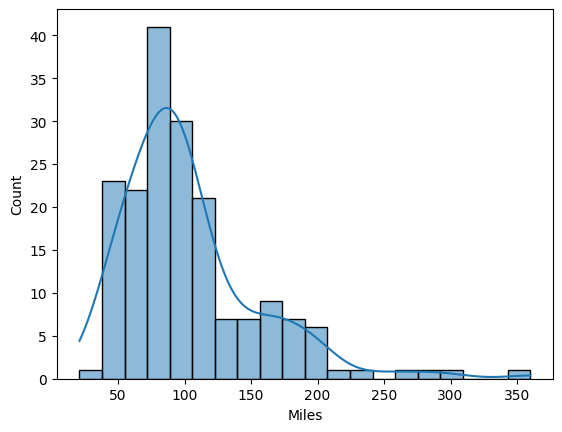

In [ ]:
sns.histplot(df['Miles'],kde=True)

In [ ]:
mean-3*std_dev

-52.396369540983486

In [ ]:
mean+3*std_dev

258.7852584298724

In [ ]:
no_outliers = df[(df['Miles']>(-52.39)) & (df['Miles']<(278.78))]
no_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# It shows the count of the no.of row and columns present in dataframe
df.shape

(180, 9)

In [ ]:
#Total number of elemnts this dataframe contains
df.size

1620

In [ ]:
# Dimension pf the datsframe
df.ndim

2

In [ ]:
# Top 5 rows of the dataframe
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Last 5 rows of the dataframe
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Columns data type
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# All the columns present in the dataframe
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
# It shows how much space used by each of the columns
df.memory_usage()

Index             128
Product          1440
Age              1440
Gender           1440
Education        1440
MaritalStatus    1440
Usage            1440
Fitness          1440
Income           1440
Miles            1440
dtype: int64

In [ ]:
# Its gave the information about the basic statistics of variables or the descriptive statistics of the data(also known to be 5 number summary)
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Value counts and unique attributes

In [ ]:
# Show us the value count of all PRODUCTS.
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [ ]:
# Show us the value count of all GENDER.
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [ ]:
# Show us the value count of all THE MARITALSTATUS.
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [ ]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [ ]:
#Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [ ]:
# Top 10 value counts for the Incomes
df['Income'].value_counts()[:10]

Income
45480    14
52302     9
46617     8
54576     8
53439     8
50028     7
51165     7
40932     6
48891     5
32973     5
Name: count, dtype: int64

In [ ]:
# Show us the value count of all the Miles coouvered by customers.
df['Miles'].value_counts()[:10]

Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [ ]:
(pd.crosstab(df['Product'], df['Gender'],normalize = True)*100).round(2)

Gender,Female,Male
Product,,
KP281,22.22,22.22
KP481,16.11,17.22
KP781,3.89,18.33


#MISSING VALUE(HANDLING)

In [ ]:
# There is no missing values available in the dataset
df.isna().sum().sum()

0

In [ ]:
# Unique number of elements
df.nunique().sum()

157

In [ ]:
# Unique elements present in every columns
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
# Unique product in the dataset
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

# OUTLIERS DETECTION

In [ ]:
# By seeing the variation between 50 percentile and mean we can also detect the outliers
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Find mean and meadian fron df
describe = df.describe().loc[['mean','50%']]
describe

,Age,Education,Usage,Fitness,Income,Miles
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000


In [ ]:
# Difference between mean and meadian
difference = abs(describe.loc['mean'] - describe.loc['50%'])
difference = difference.reset_index()
difference.rename(columns = {'index':'Columns',0:'Difference'})

,Columns,Difference
0,Age,2.788889
1,Education,0.427778
2,Usage,0.455556
3,Fitness,0.311111
4,Income,3123.077778
5,Miles,9.194444


# BIVARIATE ANALYSIS AND MULTIVARIATE ANALYSIS

Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

In [ ]:
df[:2]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


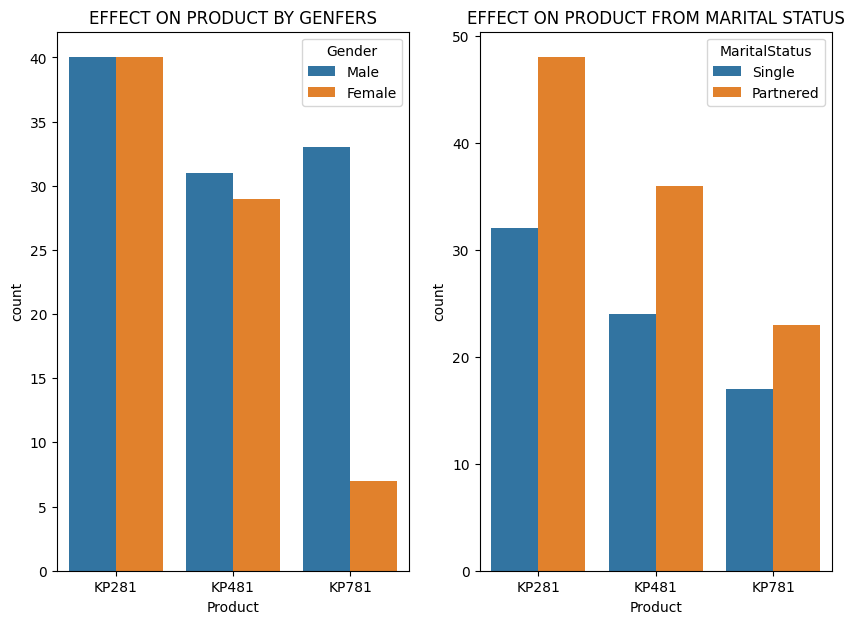

In [ ]:
# Countplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

sns.countplot(data= df, x='Product',hue = 'Gender',ax = ax[0]).set_title('EFFECT ON PRODUCT BY GENFERS')
sns.countplot(data = df, x ='Product',hue= 'MaritalStatus',ax = ax[1]).set_title('EFFECT ON PRODUCT FROM MARITAL STATUS')
plt.show()

CONCLUSION:

* KP281 product prefer by male who are partnered.
and similarly for the other products also.
* the product which are less prefered by the female cutomers are KP781 and also who all are partnered.


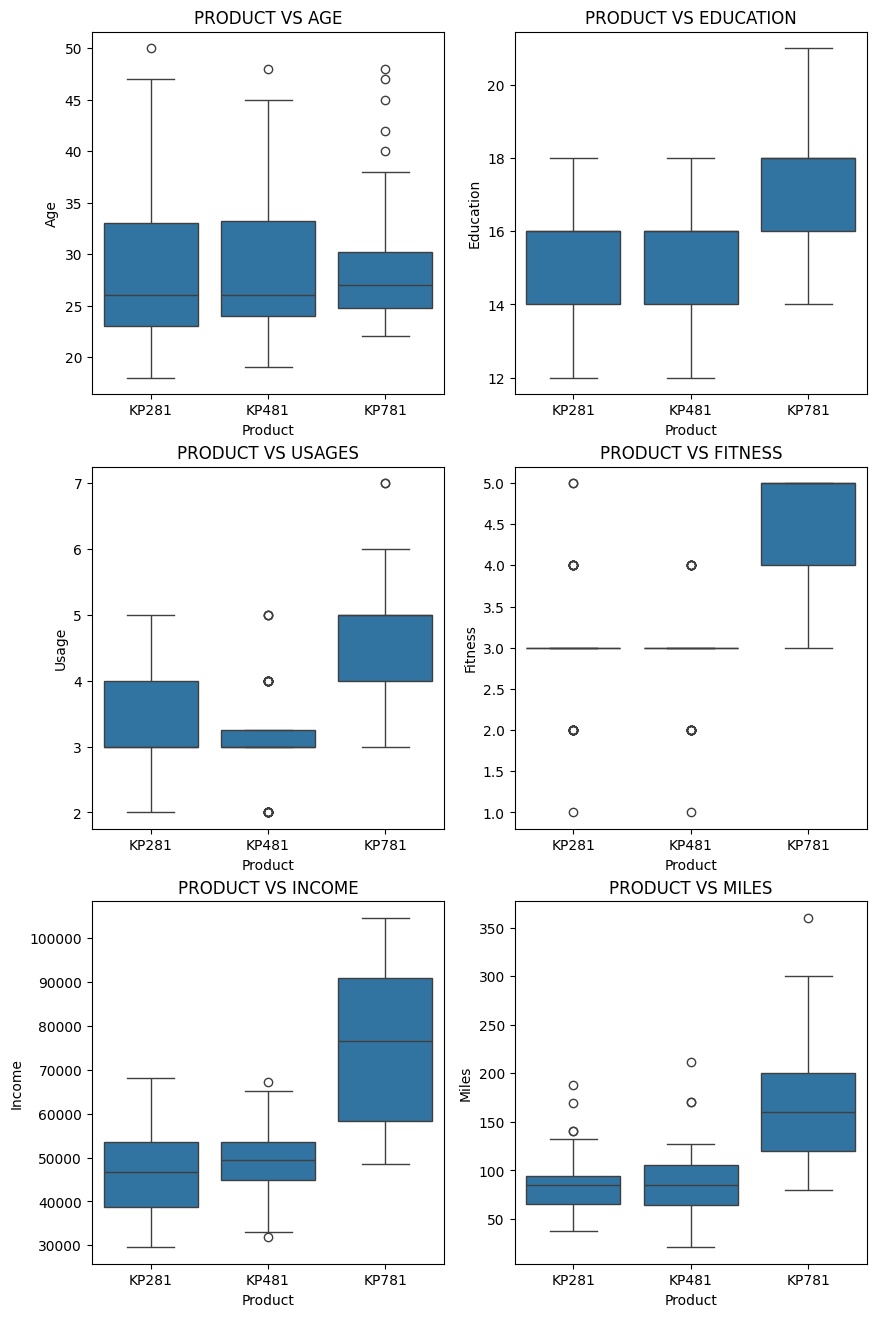

In [ ]:
# Boxplot
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))

sns.boxplot(data= df, x='Product', y='Age',ax = ax[0,0]).set_title('PRODUCT VS AGE')
sns.boxplot(data= df, x='Product', y='Education',ax = ax[0,1]).set_title('PRODUCT VS EDUCATION')
sns.boxplot(data= df, x='Product', y='Usage',ax =ax[1,0]).set_title('PRODUCT VS USAGES')
sns.boxplot(data= df, x='Product', y='Fitness',ax =ax[1,1]).set_title('PRODUCT VS FITNESS')
sns.boxplot(data= df, x='Product', y='Income',ax =ax[2,0]).set_title('PRODUCT VS INCOME')
sns.boxplot(data= df, x='Product', y='Miles',ax =ax[2,1]).set_title('PRODUCT VS MILES')

plt.show()

In [ ]:
# Create seperate dataframe for the different proucts
kp281_df = df[df['Product'] == 'KP281']
kp481_df = df[df['Product'] == 'KP481']
kp781_df = df[df['Product'] == 'KP781']

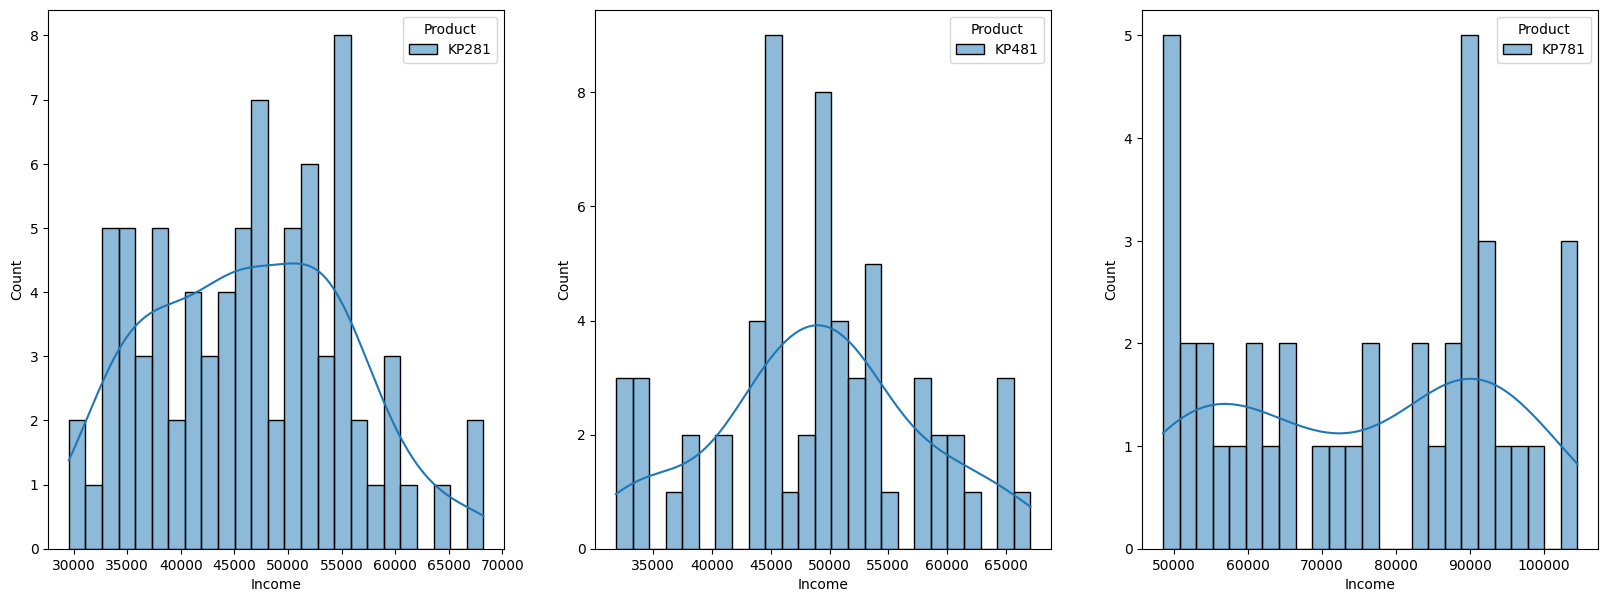

In [ ]:
# Income vs all product analysis:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.histplot(data = kp281_df, x = 'Income',hue = 'Product',kde = True,bins =25,color='yellow')

plt.subplot(1,3,2)
sns.histplot(data = kp481_df, x = 'Income',hue = 'Product',kde = True,bins =25,color='green')

plt.subplot(1,3,3)
sns.histplot(data = kp781_df, x = 'Income',hue = 'Product',kde = True,bins =25,color='blue')

plt.show()

COUNCLUSION:
* KP281 & KP481 products are bought by 30k to 70k $ earning customers.
* KP781 product bought by customers who earning more than 50k.

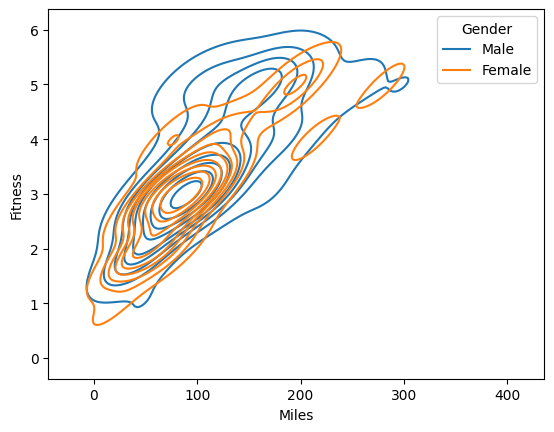

In [ ]:
sns.kdeplot(data = df, y ='Fitness',x = 'Miles', hue = 'Gender');

Observation:

Most of the customer who Runs for miles greater than 100 are having better shape i.e. grater than 3 rating.

**MULTIVARIATE ANALYSIS**

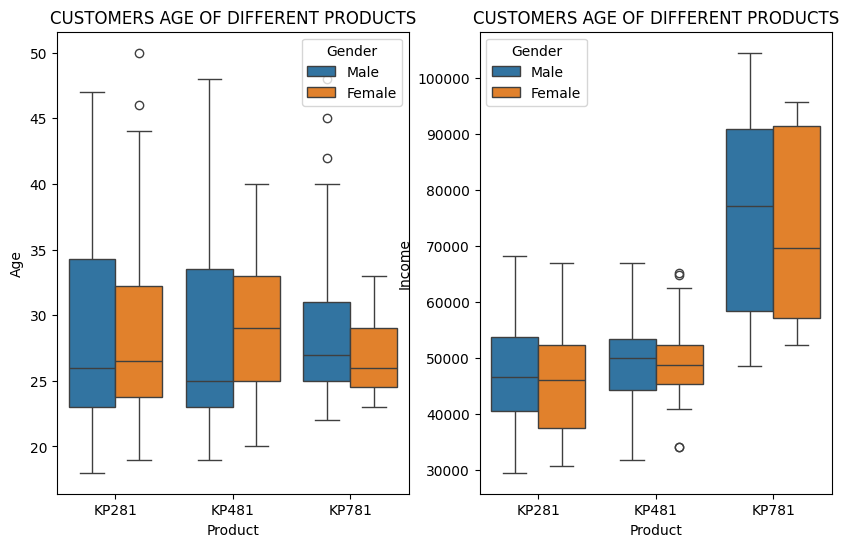

In [ ]:
# age vs product analysis
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data =df,y = 'Age',x ='Product',hue = 'Gender').set_title('CUSTOMERS AGE OF DIFFERENT PRODUCTS')
# income vs prouct analysis
plt.subplot(1,2,2)
sns.boxplot(data =df,y = 'Income',x ='Product',hue = 'Gender').set_title('CUSTOMERS AGE OF DIFFERENT PRODUCTS')
plt.show()

CONCLUSION:

* The KP281 IQR is high incomparison to other products so the meadian age for product kp281 is approx 26.
* The meadian age for the KP781 prodcut is very high in comparison to others.
* More earning cusotmers prefer KP781 product and less than the meadian income for the other products.
* KP281 product is used by the male who is in there 20's. and also for the iccome



Text(0.5, 1.0, 'PRODUCT VS EDUCATION ANALYSIS')

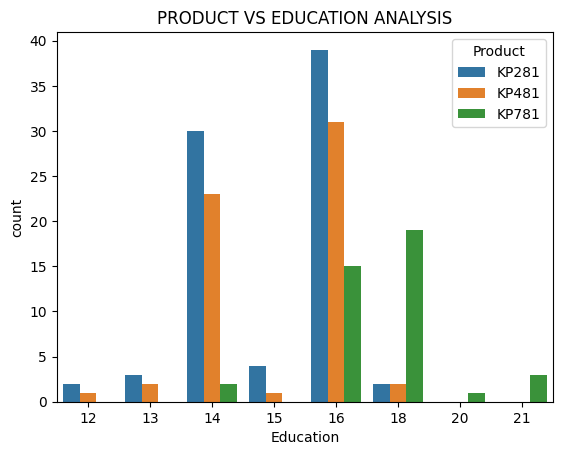

In [ ]:
# education vs product analysis
sns.countplot(data =df,hue ='Product',x = 'Education').set_title('PRODUCT VS EDUCATION ANALYSIS')

CONCLUSION:

*  More than the 16 educated customers prefer KP281 product.
*  More than 18 educated customers prefers product KP781.


# BASIC PROBABILITY ANALYSIS:
(Marginal and Conditional probability)

Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

ANALYIS ON THE BELOW RELATION TABELS:

*   PRODUCT VS GENDER
*   PRODUCT VS MARITALSTATUS
*   PRODUCT VS SELF RATE
*   PRODUCT VS Income_category
*   PRODUCT VS Age_category





In [ ]:
# create a DEEP copy of df
new_df = df.copy()
new_df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [ ]:
# new columns for ages
bins = [14,20,30,40,60]
labels = ['TEENS','IN-20s','IN-30s','ABOVE 40s']
new_df['Age_group'] = pd.cut(new_df['Age'],bins)
new_df['Age_category'] = pd.cut(new_df['Age'],bins,labels = labels)

In [ ]:
# new clumns for the incomes
bins = [29000,35000,60000,85000,105000]
labels = ['LOW INCOME','LOW-MID INCOME','UPPER-MID INCOME','HIGH INCOME']
new_df['Inome_group'] = pd.cut(new_df['Income'],bins)
new_df['Income_category'] = pd.cut(new_df['Income'],bins,labels = labels)

In [ ]:
new_df['Self_rate'] = new_df['Fitness'].replace({1:'POOR',2:'FAIR',3:'GOOD',4:'VERY GOOD',5:'EXCELLENT'})

In [ ]:
new_df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Age_category,Inome_group,Income_category,Self_rate
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",TEENS,"(29000, 35000]",LOW INCOME,VERY GOOD
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",TEENS,"(29000, 35000]",LOW INCOME,GOOD


**PRODUCT VS GENDER**

In [ ]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['Gender'],margins = True,normalize = True)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


CONCLUSION Marginal Probability:

* Probability of Male Customer Purchasing any product is : 57.77 %

* Probability of Female Customer Purchasing any product is : 42.22 %

* Marginal Probability of any customer buying
product KP281 is : 44.44 % (cheapest / entry level product)

* Product KP481 is : 33.33 % ( for intermediate users)

* Product KP781 is : 22.22 % ( product for extensive use who run/walk more miles)


In [ ]:
#conditional probability
# Probability of male customer buying the product given that it is 'KP281'
#p(male|KP281) = P(male inter kp781)/ p(kp281)
(pd.crosstab([new_df["Product"]],new_df["Gender"],margins=True,normalize="columns"))*100

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


Female Analysis:
-----
* Probability of Selling Product
KP281 | Female = 52 %

* Probability of Selling ProductKP481 | Female = 38 %

* Probability of Selling ProductKP781 | Female = 10 %
------------

Male anaysis:

* Probability of Selling ProductKP281 | male = 38 %

* Probability of Selling ProductKP481 | male = 30 %

* Probability of Selling ProductKP781 | male = 32 %*

* Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

* Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

**PRODUCT VS MARITAL STATUS**

In [ ]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['MaritalStatus'],normalize= True) *100,2)

MaritalStatus,Partnered,Single
Product,,
KP281,26.67,17.78
KP481,20.00,13.33
KP781,12.78,9.44


Marginal Probability for

* Married Customers : 59.44 %
* Single Customers : 40.555 %

CONCLUSION:

*   Most of the products used by the cusotmers who all partnerd i.e. 59,44 %.
*   KP281 had the highest in demand in comparison to other products used by the partnered couple aroun 28,67%.
*   And the sigle status customers also  use product KP281 (17.78%).



In [ ]:
np.round(pd.crosstab([new_df["Product"]],new_df["MaritalStatus"],margins=True,normalize="columns")*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.86,43.84,44.44
KP481,33.64,32.88,33.33
KP781,21.50,23.29,22.22


KP281 | Partnered = 44.85 %

KP481 | Partnered = 33.64 %

KP781 | Partnered = 21.49 %

KP281 | Single = 43.83 %

KP481 | Single = 32.87 %

KP781 | Single = 23.28 %

* Probability of Married Person purchasing any product is 59.44 %

* Probability of Single Person purchasing any product is 40.55 %

* Probability of a Married person buying product KP281 and KP481 is slightly higher than the customers who are single.

* Probability of a single person buying KP781 is higher than Married customers.

* So , KP781 is also recommended for people who are single and exercises more.

**PRODUCT VS SELF RATING**

In [ ]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['Self_rate'],margins = True,normalize = True)*100,2)

Self_rate,EXCELLENT,FAIR,GOOD,POOR,VERY GOOD,All
Product,,,,,,
KP281,1.11,7.78,30.00,0.56,5.00,44.44
KP481,0.00,6.67,21.67,0.56,4.44,33.33
KP781,16.11,0.00,2.22,0.00,3.89,22.22
All,17.22,14.44,53.89,1.11,13.33,100.00


CONCLUSION:

*   Most of the products used by the cusotmers who all gave the rating as GOOD  i.e. 53.89 %
*   KP281 had the highest rating amoungst the other products which is of 30% followed by the KP481 having 21.67 % rating

In [ ]:
# # Marginal probability
#Rating given by cutomer is excellent on the treadmill and also for the poor rating given by customer
probability_rating_excelent = round((31 / 180),2)
probability_rating_excelent = round(probability_rating_excelent* 100, 2)
probability_rating_poor = round((2 / 180),2)
probability_rating_poor = round(probability_rating_poor* 100, 2)
print(f'PROBABILITY OF EXCELLENT RATING GIVEN BY CUSTOMERS IS: {probability_rating_excelent} %')
print(f'PROBABILITY OF POOR RATING GIVEN BY CUSTOMERS IS: {probability_rating_poor} %')

PROBABILITY OF EXCELLENT RATING GIVEN BY CUSTOMERS IS: 17.0 %
PROBABILITY OF POOR RATING GIVEN BY CUSTOMERS IS: 1.0 %


In [ ]:
#conditional probability
# Probability of rating given by customer is excelent buying the product given that it is 'KP781'

prb_excelent_rating = round((29/40),2)
excelent_rating_percentage = round((prb_excelent_rating*100),2)
print(f'PROBABILITY EXCELENT RATING GIVEN BY CUSTOMER ON THE PROUCT KP781 IS: {excelent_rating_percentage}%')

PROBABILITY EXCELENT RATING GIVEN BY CUSTOMER ON THE PROUCT KP781 IS: 72.0%


**PRODUCT VS AGE CATEGORY**

In [ ]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['Age_category'],margins = True,normalize = True)*100,2)

Age_category,TEENS,IN-20s,IN-30s,ABOVE 40s,All
Product,,,,,
KP281,3.33,27.22,10.56,3.33,44.44
KP481,2.22,17.22,12.78,1.11,33.33
KP781,0.00,16.67,3.33,2.22,22.22
All,5.56,61.11,26.67,6.67,100.00


CONCLUSION:

*   Most of the products used by the cusotmers who all in their 20s i.e. 61.11 %
*   KP281  had the highest in demand in comparison to other products.




In [ ]:
# # Marginal probability
# what percent of people in thier 30s uses the treadmill
probability_20s_age = round((110/ 180),2)
probability_20s_age = round(probability_20s_age* 100, 2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ARE ALL IN THEIR 20s USES THE TREADMILL IS: {probability_20s_age}')
# what percent of people in their 30s uses the treadmill
probability_30s_age = round((48/ 180),2)
probability_30s_age = round(probability_30s_age* 100, 2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ARE ALL IN THEIR 30s USES THE TREADMILL IS: {probability_30s_age}')
# what percent of people in their 30s uses the treadmill
probability_above40s_age = round((12/ 180),2)
probability_above40s_age = round(probability_above40s_age* 100, 2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ARE ALL ABOVE - 40s USES THE TREADMILL IS: {probability_above40s_age}')


PROBABILITY OF THE CUSTOMERS WHO ARE ALL IN THEIR 20s USES THE TREADMILL IS: 61.0
PROBABILITY OF THE CUSTOMERS WHO ARE ALL IN THEIR 30s USES THE TREADMILL IS: 27.0
PROBABILITY OF THE CUSTOMERS WHO ARE ALL ABOVE - 40s USES THE TREADMILL IS: 7.0


In [ ]:
#conditional probability
# Probability of cusotmers who are in their 20s uses the product 'KP281'

prb_cust = round((49/80),2)
percentage_cust = round((prb_cust*100),2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ALL ARE IN THEIR 20S USES THE PROUCT KP281 IS: {percentage_cust}%')

# Probability of cusotmers who are in their 30s uses the product 'KP481'

prb_cust = round((23/60),2)
percentage_cust = round((prb_cust*100),2)
print(f'PROBABILITY OF THE CUSTOMERS WHO ALL ARE IN THEIR 30S USES THE PROUCT KP481 IS: {percentage_cust}%')

PROBABILITY OF THE CUSTOMERS WHO ALL ARE IN THEIR 20S USES THE PROUCT KP281 IS: 61.0%
PROBABILITY OF THE CUSTOMERS WHO ALL ARE IN THEIR 30S USES THE PROUCT KP481 IS: 38.0%


**PRODUCT VS INCOME CATEGORY**

In [ ]:
round(pd.crosstab(index = new_df['Product'],columns = new_df['Income_category'],margins = True,normalize = True)*100,2)

Income_category,LOW INCOME,LOW-MID INCOME,UPPER-MID INCOME,HIGH INCOME,All
Product,,,,,
KP281,4.44,36.67,3.33,0.00,44.44
KP481,3.33,26.11,3.89,0.00,33.33
KP781,0.00,6.11,6.67,9.44,22.22
All,7.78,68.89,13.89,9.44,100.00


CONCLUSION:

Most of the products purchased by the customers who are having salary in low to mid income category i.e. 68.89%

In [ ]:
#marginal probability
# In which income ranges the amount of treadmill purchased is high
# for the low income people
income_prob = round((14/180),2)
income_pct = income_prob* 100
print(f'THE CUSTOMERS WHOSE INCOME FALL UNDER LOW CATEGORY HAVE PURCHASED APPROX: {income_pct} %')

income_prob = round((124/180),2)
income_pct = round((income_prob*100),2)
print(f'THE CUSTOMERS WHOSE INCOME FALL UNDER LOW - MID CATEGORY HAVE PURCHASED APPROX: {income_pct} %')

income_prob = round((25/180),2)
income_pct = round((income_prob* 100),2)
print(f'THE CUSTOMERS WHOSE INCOME FALL UNDER UPPER - MID CATEGORY HAVE PURCHASED APPROX: {income_pct} %')

income_prob = round((17/180),2)
income_pct = income_prob* 100
print(f'THE CUSTOMERS WHOSE INCOME FALL UNDER HIGH CATEGORY HAVE PURCHASED APPROX: {income_pct} %')

THE CUSTOMERS WHOSE INCOME FALL UNDER LOW CATEGORY HAVE PURCHASED APPROX: 8.0 %
THE CUSTOMERS WHOSE INCOME FALL UNDER LOW - MID CATEGORY HAVE PURCHASED APPROX: 69.0 %
THE CUSTOMERS WHOSE INCOME FALL UNDER UPPER - MID CATEGORY HAVE PURCHASED APPROX: 14.0 %
THE CUSTOMERS WHOSE INCOME FALL UNDER HIGH CATEGORY HAVE PURCHASED APPROX: 9.0 %


In [ ]:
# conditional probability
# what is the probability of the customers whose salary range lies in the low - mid income given that he had purchased kp281 product?
prb_kp281_cust = round((66/124),2)
kp281_pct = prb_kp281_cust* 100
print(f'{kp281_pct} % CUSTOMERS HAD PURCHASED PRODUCT KP281 WHOSE INCOME RANGES IN LOW - MID CATEGORY i.e. AVERAGE CUSTOMERS')

53.0 % CUSTOMERS HAD PURCHASED PRODUCT KP281 WHOSE INCOME RANGES IN LOW - MID CATEGORY i.e. AVERAGE CUSTOMERS


# PROBABILITY ANALYSIS

In [ ]:
n_df =df[['Product','Gender','MaritalStatus']].melt()
round(n_df.groupby(['variable','value'])['value'].count()/len(df)*100,2)

variable       value    
Gender         Female       42.22
               Male         57.78
MaritalStatus  Partnered    59.44
               Single       40.56
Product        KP281        44.44
               KP481        33.33
               KP781        22.22
Name: value, dtype: float64

ANALYSIS ON MALE WHO ARE SINGLE

In [ ]:
df_ms = df[(df['Gender'] ==  'Male') & (df['MaritalStatus'] == 'Single')]
df_ms.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141


In [ ]:
prob1 = round(len(df_ms[df_ms['Product'] == 'KP281'])/ len(df_ms) * 100,2)
prob2 = round(len(df_ms[df_ms['Product'] == 'KP481'])/ len(df_ms) * 100,2)
prob3 = round(len(df_ms[df_ms['Product'] == 'KP781'])/ len(df_ms) * 100,2)
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP281 IS: {prob1}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP481 IS: {prob2}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP781 IS: {prob3}%')

PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP281 IS: 44.19%
PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP481 IS: 23.26%
PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP781 IS: 32.56%


ANALYSIS ON MALE WHO ARE PARTNERED

In [ ]:
df_mP = df[(df['Gender'] ==  'Male') & (df['MaritalStatus'] == 'Partnered')]
df_mP.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
4,KP281,20,Male,13,Partnered,4,2,35247,47
14,KP281,23,Male,16,Partnered,3,1,38658,47
15,KP281,23,Male,16,Partnered,3,3,40932,75
17,KP281,23,Male,16,Partnered,4,3,39795,94
25,KP281,24,Male,13,Partnered,3,2,42069,47


In [ ]:
prob1 = round(len(df_mP[df_mP['Product'] == 'KP281'])/ len(df_mP) * 100,2)
prob2 = round(len(df_mP[df_mP['Product'] == 'KP481'])/ len(df_mP) * 100,2)
prob3 = round(len(df_mP[df_mP['Product'] == 'KP781'])/ len(df_mP) * 100,2)
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP281 IS: {prob1}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP481 IS: {prob2}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP781 IS: {prob3}%')

PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP281 IS: 34.43%
PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP481 IS: 34.43%
PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP781 IS: 31.15%


ANALYSIS ON FEMALE WHO ARE SINGLE

In [ ]:
df_fs = df[(df['Gender'] ==  'Female') & (df['MaritalStatus'] == 'Single')]
df_fs.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
12,KP281,22,Female,16,Single,4,3,36384,75
13,KP281,22,Female,14,Single,3,3,35247,75
16,KP281,23,Female,14,Single,2,3,34110,103
18,KP281,23,Female,16,Single,4,3,38658,113
22,KP281,24,Female,16,Single,4,3,42069,94


In [ ]:
prob1 = round(len(df_fs[df_fs['Product'] == 'KP281'])/ len(df_fs) * 100,2)
prob2 = round(len(df_fs[df_fs['Product'] == 'KP481'])/ len(df_fs) * 100,2)
prob3 = round(len(df_fs[df_fs['Product'] == 'KP781'])/ len(df_fs) * 100,2)
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP281 IS: {prob1}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP481 IS: {prob2}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP781 IS: {prob3}%')

PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP281 IS: 43.33%
PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP481 IS: 46.67%
PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP781 IS: 10.0%


ANALYSIS ON FEMALE WHO ARE PARTNERED

In [ ]:
df_fp = df[(df['Gender'] ==  'Female') & (df['MaritalStatus'] == 'Partnered')]
df_fp.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
5,KP281,20,Female,14,Partnered,3,3,32973,66


In [ ]:
prob1 = round(len(df_fp[df_fp['Product'] == 'KP281'])/ len(df_fp) * 100,2)
prob2 = round(len(df_fp[df_fp['Product'] == 'KP481'])/ len(df_fp) * 100,2)
prob3 = round(len(df_fp[df_fp['Product'] == 'KP781'])/ len(df_fp) * 100,2)
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP281 IS: {prob1}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP481 IS: {prob2}%')
print(f'PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP781 IS: {prob3}%')

PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP281 IS: 58.7%
PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP481 IS: 32.61%
PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP781 IS: 8.7%


CONCLUSIONS:

1. Probability of customer Buying the product KP281 has increased from 44.44% to 58.7%, if customer is Female and Partnered form the singles wwho are male.
2. Probability of customer Buying the prouct KP481 has increased from 33.33% to 46.7%, if customer is Female and Single.
3. Probability of the customers Buying the prouct KP781 increased from 22.22% to 32.56%, if customer is Male and Single.
4. Probability of Buying the prouct KP781 decreased from 31.15% to 8.7%, if customer is Female and Partnered.




# **HEATMAP AND PAIRPLOT**

Check correlation among different factors using heat maps or pair plots.

**HEATMAP**

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),linewidth = 2,cmap = 'Greens',annot = True)
plt.xticks(rotation = 90)
plt.title('CORRELATIONS')
plt.show()

ValueError: could not convert string to float: 'KP281'

<Figure size 1000x500 with 0 Axes>

CONCLUSION:
* Miles and usage and Miles and Fitness are highly correlated ,which conclude that if the customer usage is high their fitness level is also very high and miles he/ she more run/walk per week increases simultaneoulsy.
* Income and Education also shows a strong correlation which means that highly educated customer which all are having high salary prefer the KP281 product.
* And there is no such relation or string correlation between other fields.

**PAIRPLOT**

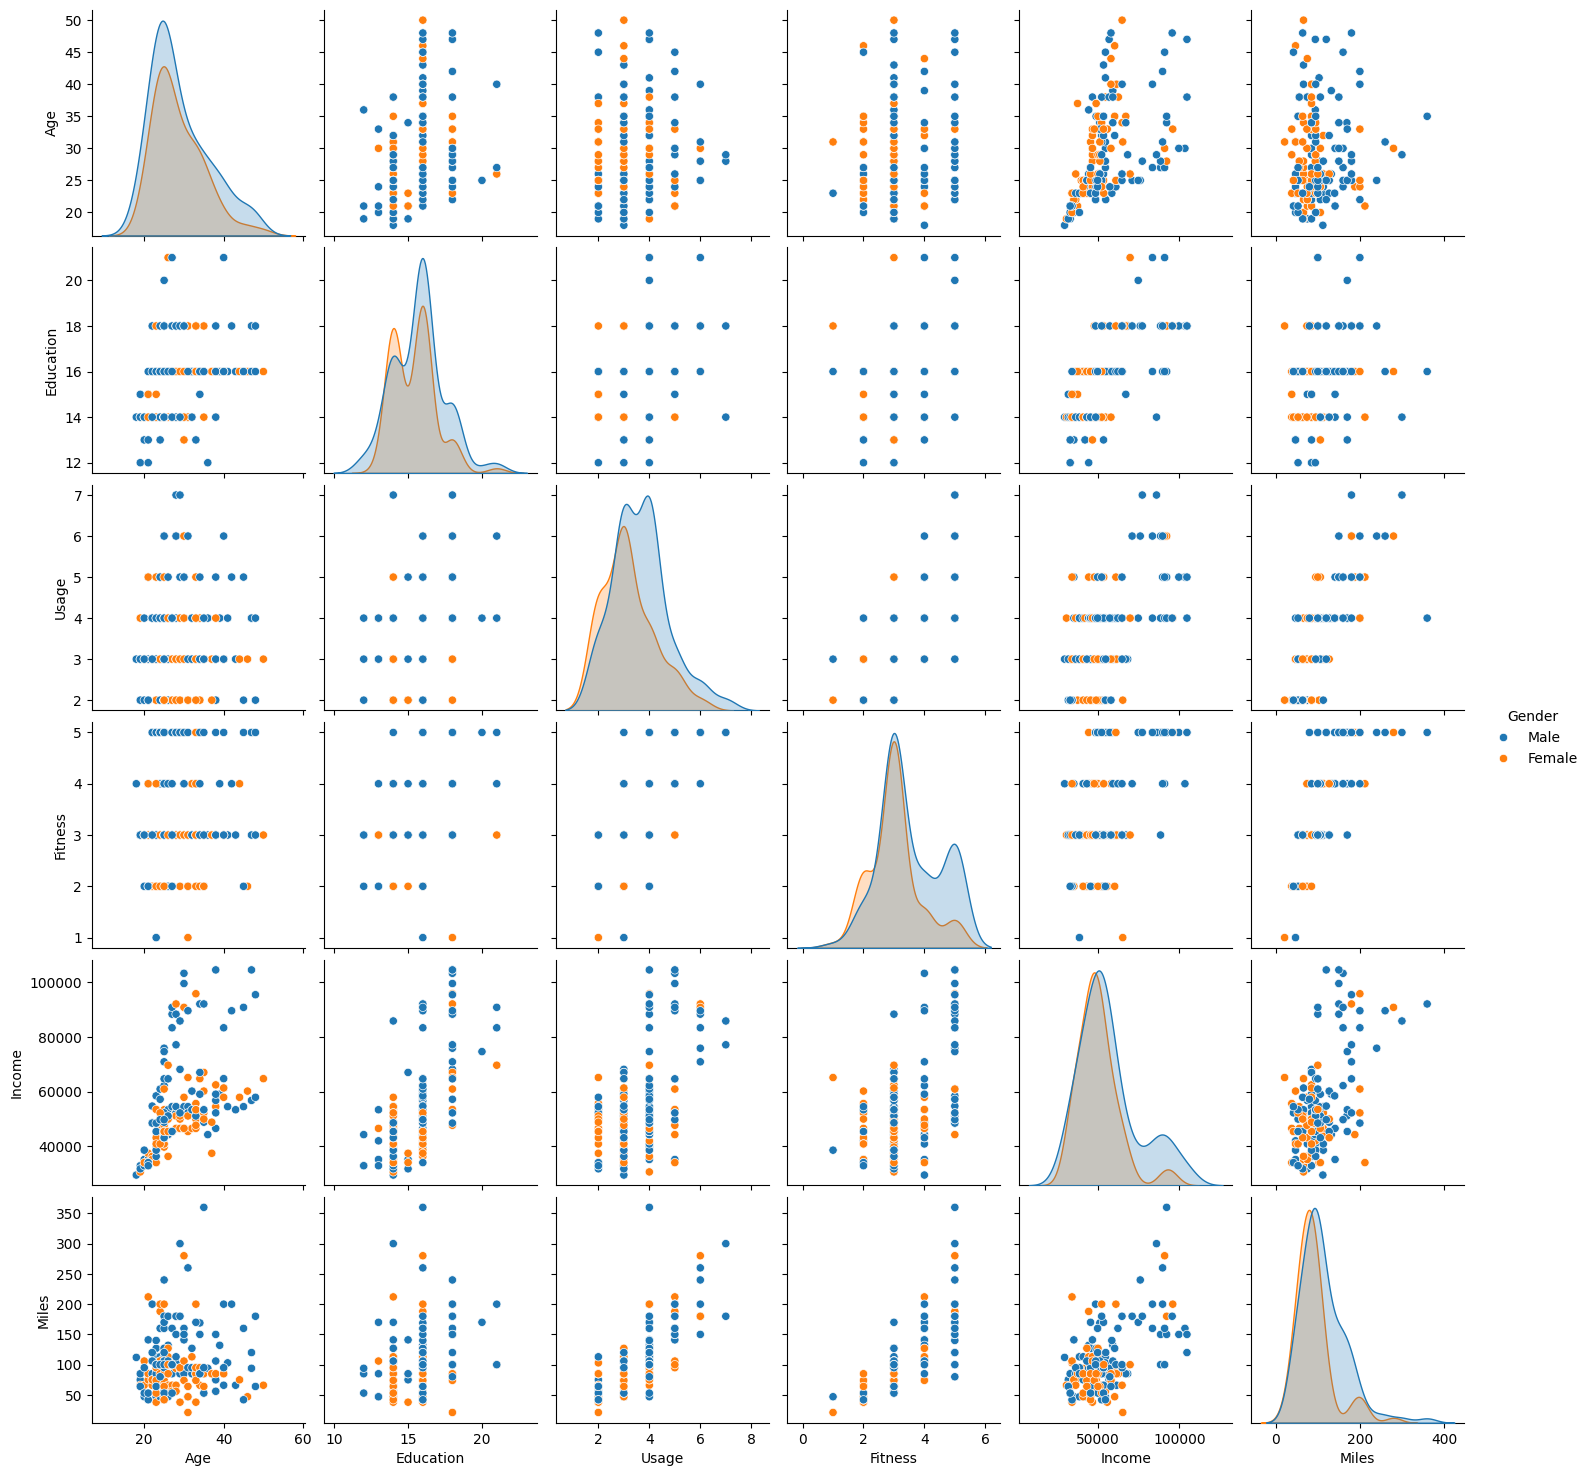

In [ ]:
sns.pairplot(df,hue = 'Gender')

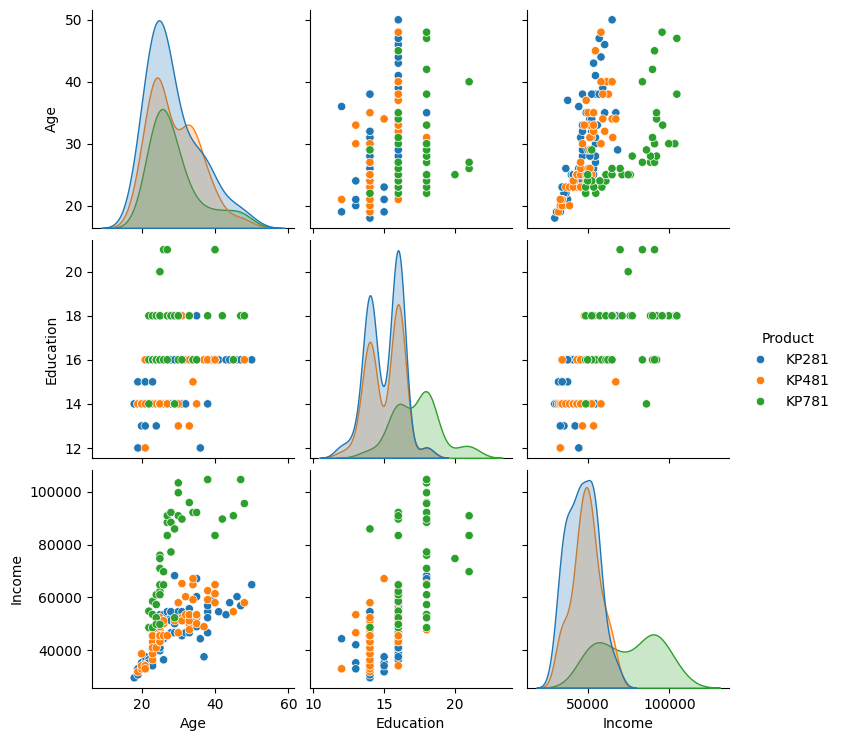

In [ ]:
sns.pairplot(data=df[['Product','Age','Education','Income','Gender']], hue='Product')

CONCLUSION:

* If usage is more than 150 miles per km, mostly preferred KP781.
* Fitness level greater than 3 and usage more than 4days per week, are prefers KP781.
* High salaried customers prefer KP781.
* Customer having income around 50000, runs/walks around 50 to 150 miles each week.
* There is a positive correlation between age and income.
* Customer haivng age from 20 to 35, runs/walks around 130 miles each week.

# CUSTOMERS PROFILE:

### ***CUSTOMER PROFILE FOR THE PRODUCT KP281:***

*  KP281 procduct has more chances of buying then the other products.
*  Customer who are male and single prefer this product
*  Customer who  are female and partnered also prefer this prouct more.
*  Mostly preferd by the partnered cusotmers.
* Fitness level of cutomer mostly fall under 3.
* salary for this customers falls under the low - medium category.
* Education : less than 16
* Miles : Under 90
* usage is less than 4 days per week.

Marital Status : Both, but targeted more towards Partnered (60% Probability).

Gender: Both(Targeted)


### ***CUSTOMER PROFILE FOR THE PRODUCT KP481:***
* This is the second highest popular Product.
* Age: Around 28, but under 35
* Income : If Partnered then around 50000 else less than 50000
* Education : iees in less than 16(rating)
*  This product has almost similar customer's profile like KP281, but KP281  has wide range of customers than KP481 prouct .
* Male customers who partnered prefer more than Male customers who single.
* Income of customers falls under Less to medium earning category.
* Fitness level of cusotmers falls mostly under 3.
* It has almost similar customer's profile like KP281, but KP281 is wide range of customers than KP481.
* Usage under 4 days per week.

Marital Status : Both, but targeted more towards Partnered (60% Probability)

Gender: Both, but targeted more towards Male (51.7% Probability)

### ***CUSTOMER PROFILE FOR THE PRODUCT KP781:***

* This type of product mostly prefered by the High salary customers. And also upper - mid salary category.
* Age: Under 30
* Income : Above 60000
* Customers who educated more than 16 years.
* Mostly preferred by Male customers.
* Usage more than 120 miles per week.
* Fitness level cutomers are above 3.
* Usage more than 4 days per week.

Maritial Status : Both, but targeted more towards Partnered (57% Probability)


# BUSINESS INSIGHTS

* Most prefered prodcut or sold product is KP281 which are having approx 44.44% of total sales.
* Least sold product is KP781 22.2 %.
* Treadmill KP781 had unique among other treadmills when it comes to more usage or high fitness customers.
* KP281 is mostly prefered by the partnered customered.
* KP781 is less prefered by the single customers.
* For KP281 and KP481 product,education falls below 16 and for KP781 product education falls above 16.
* Usages of product KP281 is less than 4 and for product kP781 it is above 4.
* Most of the customer are male than females having 55.8 % total percentage tha 42.2% of females.
* Cusotmers who are partnered uses the treadmill most then the singles, which are having approx percentage of 59.4% and singles having percentage of approx 40.6%.
* Cusotomer profile for the product KP281 and KP481 are almost same.
* Male Partnered prefer KP481 & Female Partnered prefer KP281.
* Treadmill usage is approx 3 which is the average number of times customers plans to use the treadmill each week.
* For product KP281 and Kp481 75% of income data falls under 53000$.
* And for Product Kp781 75% of salry falls below 90000 $.
* PROBABILITY OF A CUSTOMER WHO ARE MALE AND SINGLE BUYING THE PRODUCT KP281 IS: 44.19%
* PROBABILITY OF A CUSTOMER WHO ARE MALE AND PARTNERED BUYING THE PRODUCT KP281 AND KP481 IS: 34.43%
* PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND SINGLE BUYING THE PRODUCT KP281 IS: 43.33%
* PROBABILITY OF A CUSTOMER WHO ARE FEMALE AND PARTNERED BUYING THE PRODUCT KP281 IS: 58.7%

# RECOMMENDATION

* Provide advertisment for the products which are having low reach then the other products like KP481, KP781.
* As KP281 & KP481 products are preferred by almost similar Characteristics customers and KP281 is most sold product So, we can promote KP481 products more by showing them that it aslo have some advaced features which are also present in the KP281 product etc.
* Target the young gen cusotmers. As the Product kp281 and kp481 mostly used by the cutomers who all fall under 20's so we can attract these generation by providing more features on the treadmill like music functioon, motion sensor,body temperature sensor, sreen which shows the circuit and points for each mile etc. advancements are required.
* The KP781 product are preferred by Males, more usage and customer with high salay, we can promote this product with similar characteristics and also we can promote upcoming products to them.
* We can more promote these treadmils in the social media platforms and also the E-commerce sites to increase the reach of the products.
